# Churn Modelling EDA — STARTER NOTEBOOK

**Data Analytics @ Newman University**


## About this Data Set
**This data is from [the Churn-Modelling data set from Kaggle](https://www.kaggle.com/shubh0799/churn-modelling).**<br/>
**Number of Records:** 10,000<br/>
**Number of original fields:** 14 (including a supplied index)<br/>
**Fields include:**
- `RowNumber` - a supplied index
- `CustomerId` - unique ID number for each customer
- `Surname` - customer last name
- `CreditScore` - customer credit score
- `Geography` - the country in which the customer resides
- `Gender` - Male or Female
- `Age` - customer's age as integer
- `Tenure` - number of years as a customer, in integers
- `Balance` - customer's total bank balance
- `NumOfProducts` - the number of banking products a custom participates in
- `HasCrCard` - binary 0 or 1 indicating whether the customer has a bank credit card
- `IsActiveMember` - binary 0 or 1 indicating whether the customer has been active within past ?? time period
- `EstimatedSalary` - the customer's estimated salary
- `Exited` - binary 0 or 1 indicating whether the customer has left the bank and closed all accounts

# Import Libraries & Set Default Plot Attributes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Customize seaborn plot styles
# Seaborn docs: https://seaborn.pydata.org/tutorial/aesthetics.html

# Adjust to retina quality
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# Adjust dpi and font size
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook', font_scale = 0.8)

# Display tick marks
sns.set_style('ticks')

# Remove borders
plt.rc('axes.spines', top=False, right=False, left=False, bottom=False)

In [3]:
# Color palettes for plots
# Named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
# Seaborn color palette docs: https://seaborn.pydata.org/tutorial/color_palettes.html
# Seaborn palette chart: https://www.codecademy.com/article/seaborn-design-ii

# cp1 Color Palette - a binary blue/orange palette
blue = 'deepskyblue' # Use 'skyblue' for a lighter blue
orange = 'orange'
cp1 = [blue, orange]

# cp2 Palette - Reversed binary color order when needed for certain plots
cp2 = [orange, blue]

# cp5 Palette - 5 colors for use with categorical data
turqoise = 'mediumaquamarine'
salmon = 'darksalmon'
tan = 'tan'
gray = 'darkgray'
cp5 = [blue, turqoise, salmon, tan, gray]

# cpd Palette - blue-to-orange diverging palette for correlation heatmaps
cpd = sns.diverging_palette(242, 39, s=100, l=65, n=11)

# Set the default palette
sns.set_palette(cp1)

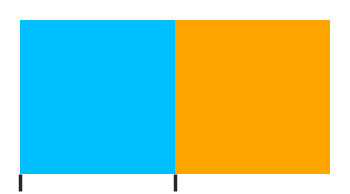

In [4]:
# View cp1 color palette
sns.palplot(cp1)

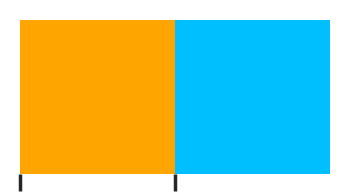

In [5]:
# View cp2 color palette
sns.palplot(cp2)

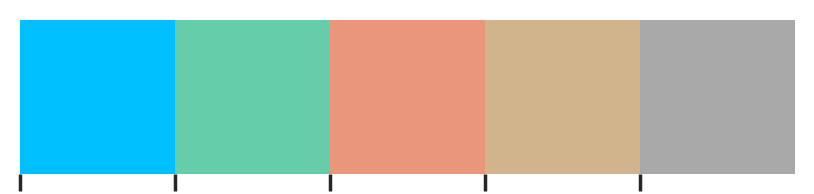

In [6]:
# View cp5 color palette
sns.palplot(cp5)

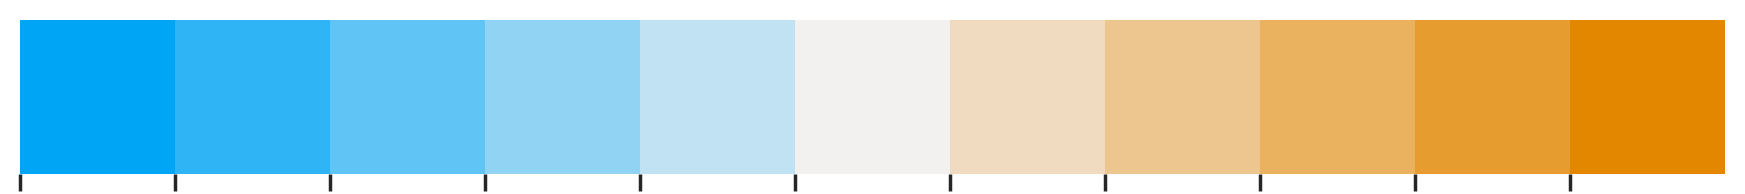

In [7]:
# View cpd color palette
sns.palplot(cpd)

# Read and Review the Data

In [8]:
# Read the data
# Use the provided RowNumber column as the index
df = pd.read_csv('./data/Churn_Modelling.csv', index_col = 'RowNumber')
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [9]:
# Dataframe fundamental info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


**NOTE: _No missing data!_** That's an issue we don't have to worry about with this data set.

In [10]:
# Check number of unique values per field
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**Notes**:
- There are 10,000 unique CustomerId's so we assume 10,000 unique customers.
- Many customers share last names, but we will assume that's a reasonable proportion.
- Fields with only a handful of unique values can be considered categorical (for text fields like Geography) or ordinal (for fields like NumOfProducts).
- Four fields are binary (yes/no): Gender, HasCrCard, IsActiveMember, Exited (the target variable).

# Drop Irrelevant Columns

**These have no predictive value**:
- CustomerId
- Surname

In [11]:
# Drop CustomerId and Surname
df = df.drop(columns=['CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Explore Target Variable: Exited
- Exited = 0 --> did not leave our company
- Exited = 1 --> left the company

In [12]:
# Of these 10,000, how many exited?
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

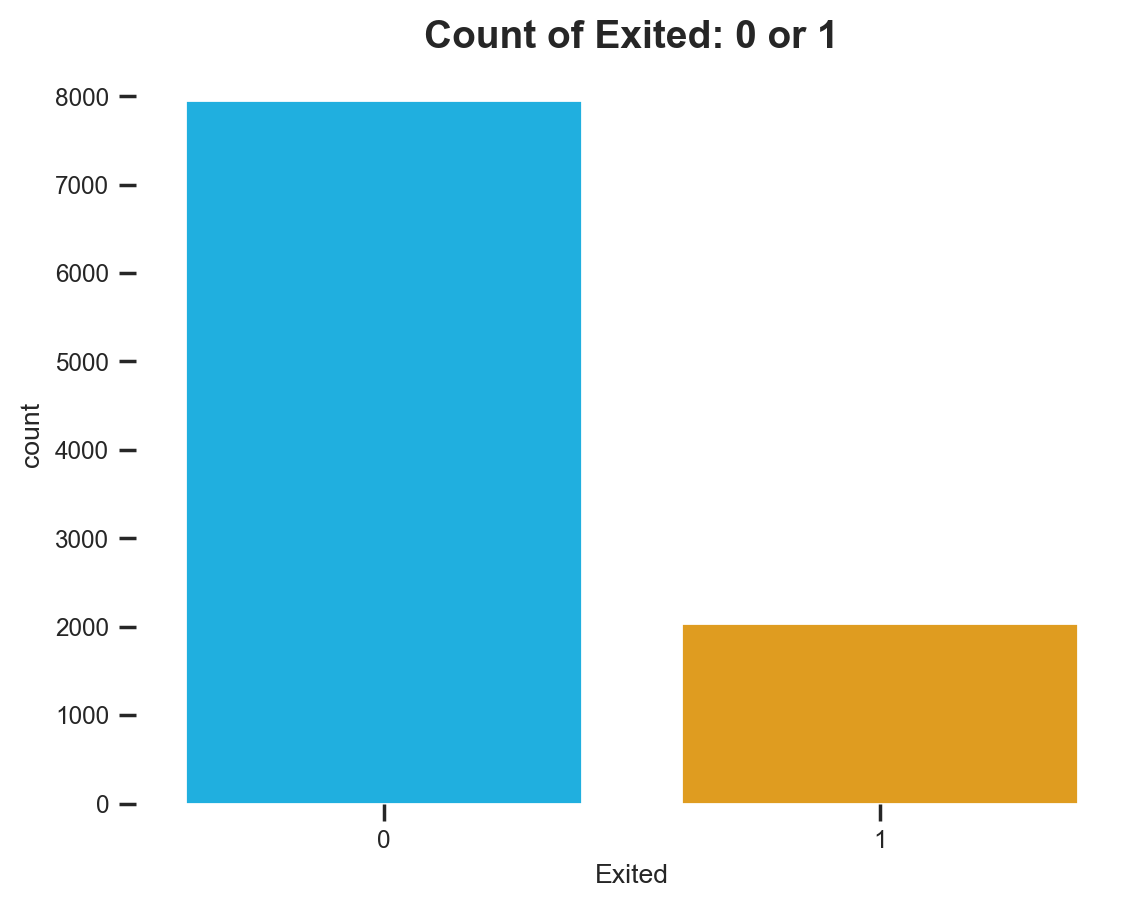

In [13]:
# Countplot
plt.title("Count of Exited: 0 or 1", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='Exited');
# ax.set(xlabel = 'Custom x axis label', ylabel='Custom y axis label');

**2037 or 20.37% of our customers exited.**

# Explore Continuous Features
We'll explore these features, which are continuous:
- CreditScore
- Age
- Tenure
- Balance
- Estimated Salary

Keep Exited as the target variable for analysis

In [14]:
# Create a variable to filter for our continuous features
cont = ['Exited','CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [15]:
# View summary stats for continuous features
# Round the output to two decimals for easier reading. See: https://gist.github.com/data-enhanced/0c48586f36e8cd27ffad8fe076d62c4e
df[cont].describe().apply(lambda s: s.apply('{:,.2f}'.format))

,Exited,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,0.20,650.53,38.92,5.01,"76,485.89","100,090.24"
std,0.40,96.65,10.49,2.89,"62,397.41","57,510.49"
min,0.00,350.00,18.00,0.00,0.00,11.58
25%,0.00,584.00,32.00,3.00,0.00,"51,002.11"
50%,0.00,652.00,37.00,5.00,"97,198.54","100,193.91"
75%,0.00,718.00,44.00,7.00,"127,644.24","149,388.25"
max,1.00,850.00,92.00,10.00,"250,898.09","199,992.48"


In [16]:
# Group by Exited and view the mean for each continuous variable
# Round the output to two decimals for easier reading
df[cont].groupby('Exited').mean().apply(lambda s: s.apply('{:,.2f}'.format))

,CreditScore,Age,Tenure,Balance,EstimatedSalary
Exited,,,,,
0,651.85,37.41,5.03,"72,745.30","99,738.39"
1,645.35,44.84,4.93,"91,108.54","101,465.68"


**Observation on above:** There are no huge and obvious differences between the mean scores across these variables for customers who did or did not exit. The widest gaps in means are for Age and Balance, then CreditScore and NumOfProducts. Those who exited are on average older with a larger balance, slightly fewer avg products, and a slightly lower avg CreditScore.

## CreditScore

In [17]:
# Basic Stats
df[['CreditScore','Exited']].groupby('Exited').describe().apply(lambda s: s.apply('{:,.2f}'.format))

CreditScore                                                        
             count    mean     std     min     25%     50%     75%     max
Exited                                                                    
0         7,963.00  651.85   95.65  405.00  585.00  653.00  718.00  850.00
1         2,037.00  645.35  100.32  350.00  578.00  646.00  716.00  850.00

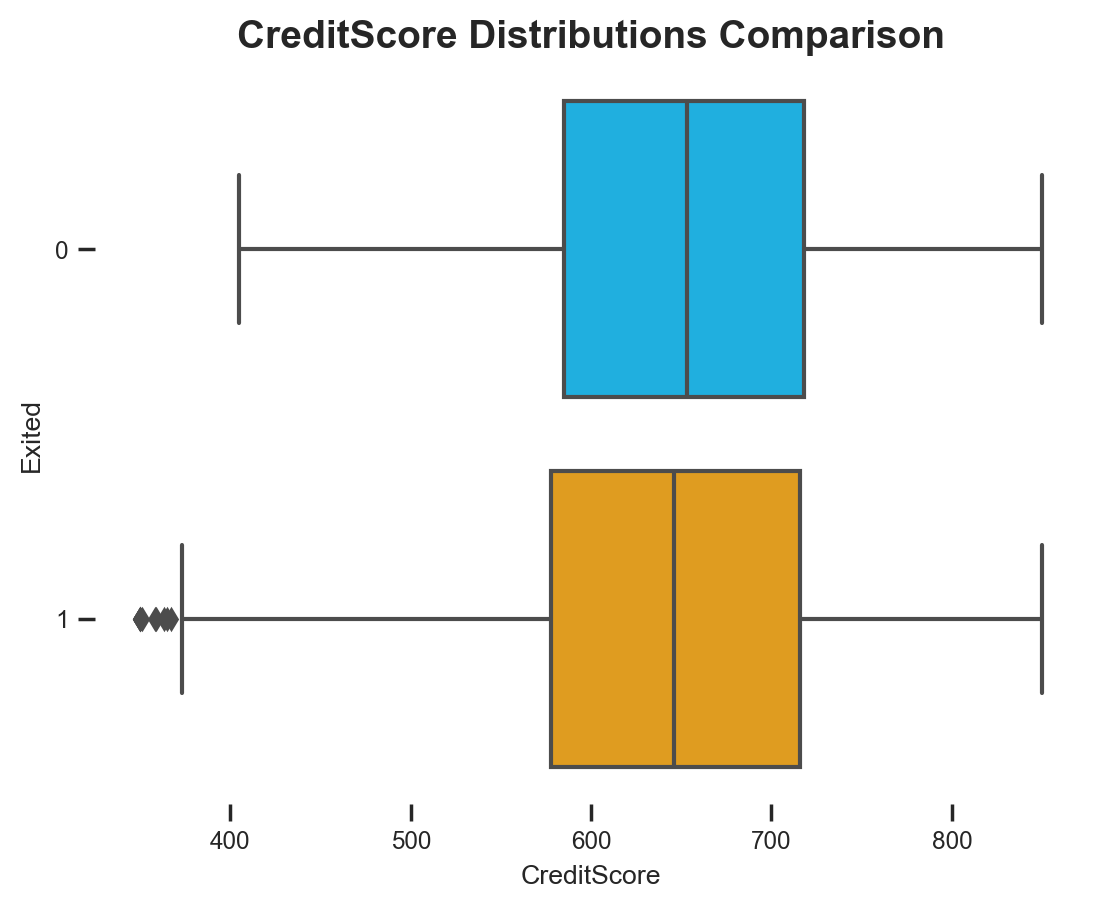

In [18]:
# Box Plots
plt.title("CreditScore Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.boxplot(data=df, x='CreditScore', y='Exited', orient='h');
# ax.set(xlabel = 'Custom x axis label', ylabel='Custom y axis label');

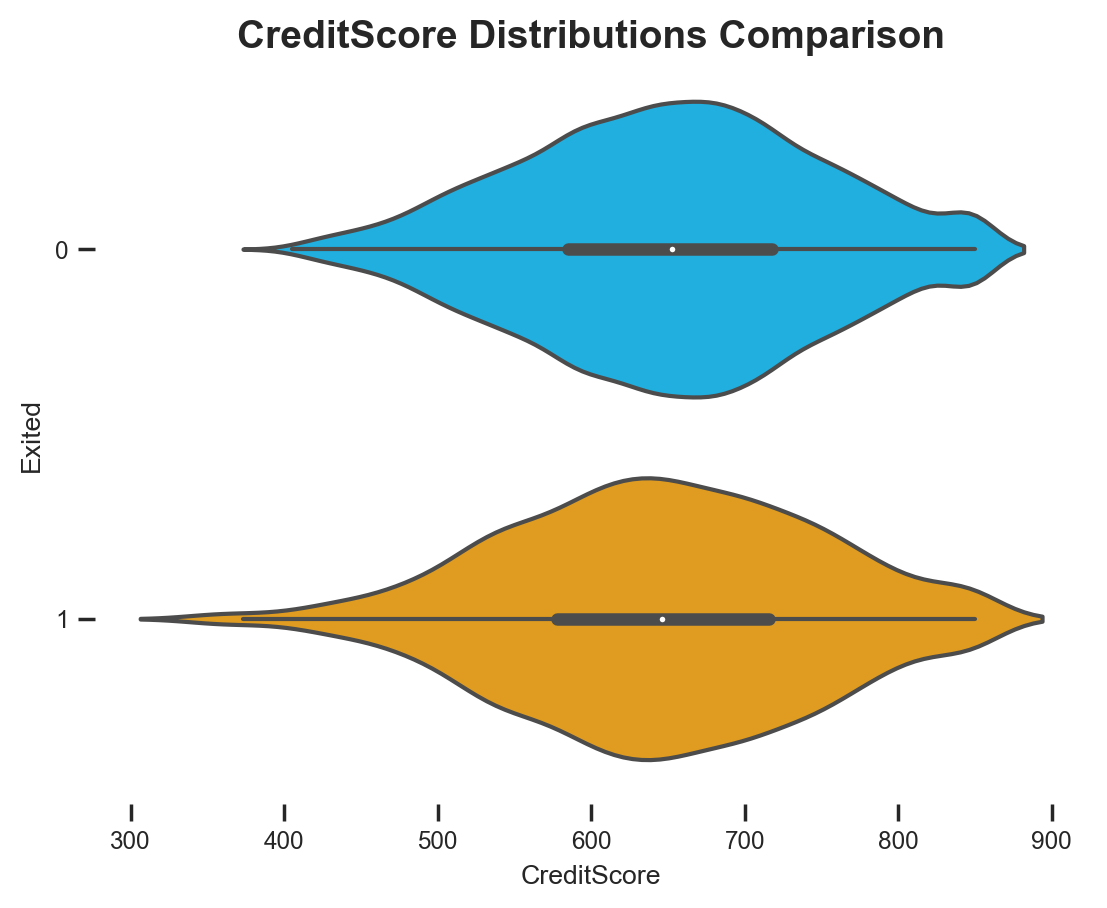

In [19]:
# Violin Plots
plt.title("CreditScore Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.violinplot(data=df, x='CreditScore', y='Exited', orient='h');
# ax.set(xlabel = 'Custom x axis label', ylabel='Custom y axis label');

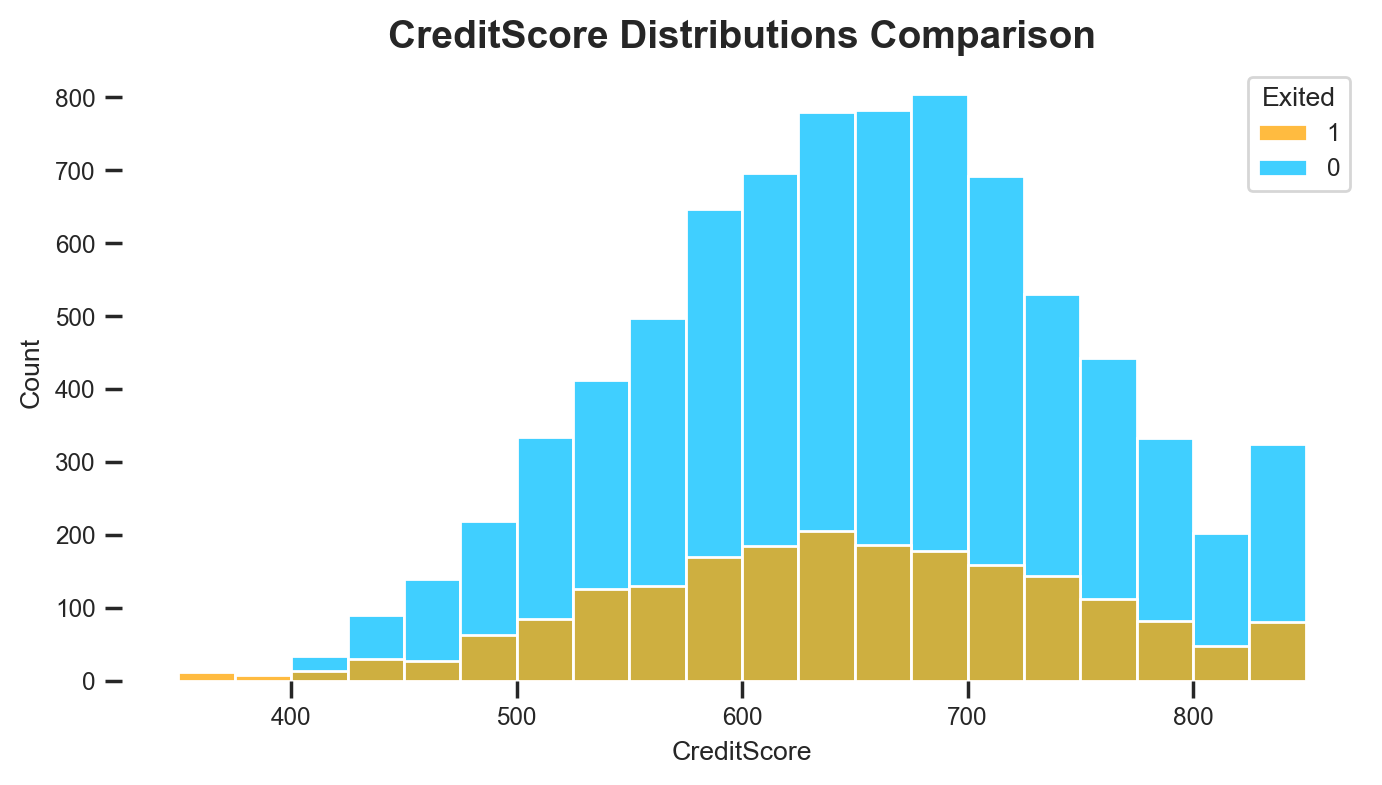

In [20]:
# Histogram
# Control hue_order and palette to display minority class in orange on top: hue_order=1,0 and palette=cp2
plt.figure(figsize=(8,4))
plt.title("CreditScore Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.histplot(data=df, x='CreditScore', hue='Exited', hue_order=[1,0], palette=cp2, binwidth=25, alpha=0.75);
# ax.set(xlabel = 'Custom x axis label', ylabel='Custom y axis label');

**Interpretation:** The distributions for Exited/Non-Exited CreditScores are nearly identical. Those who exited peak at just a slightly lower CreditScore (625) than those who did not (675).

## Age

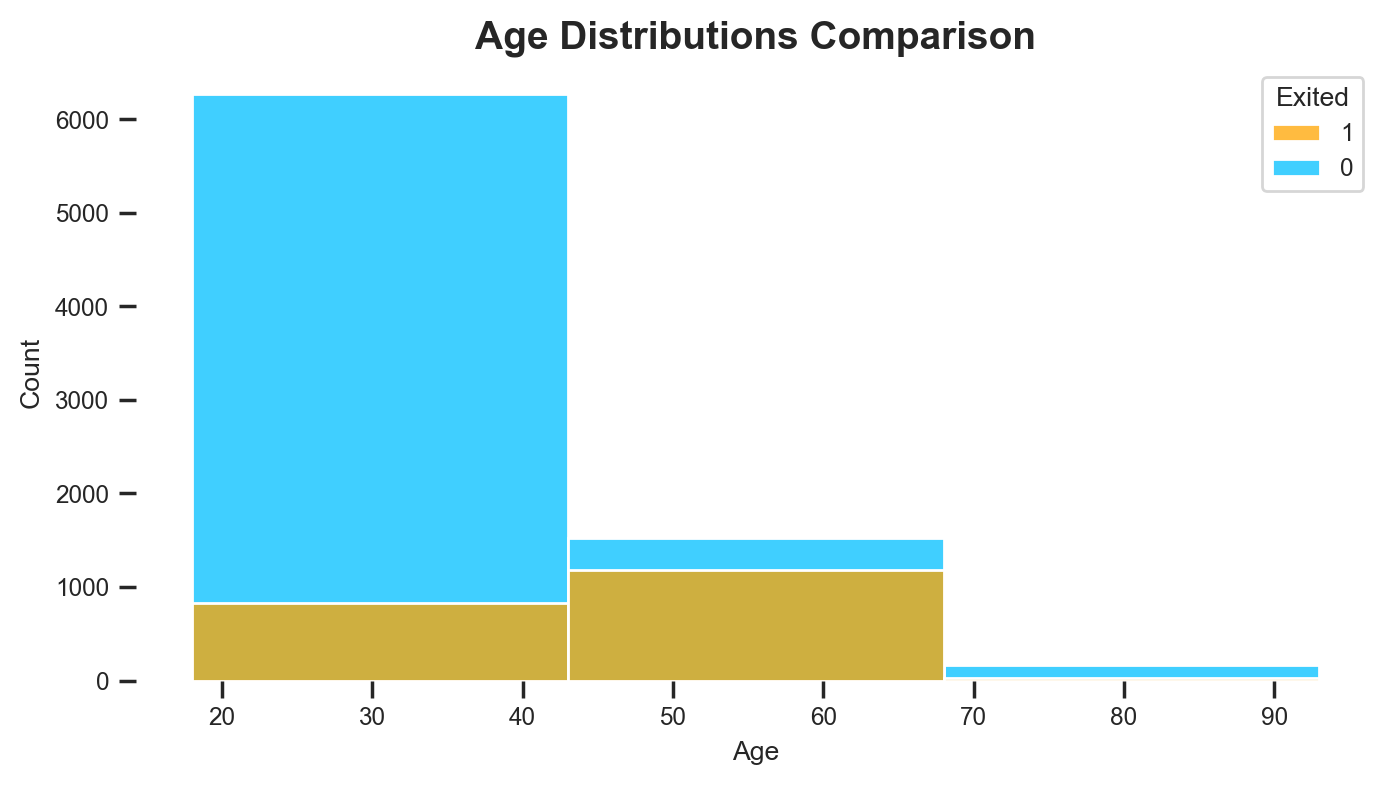

In [21]:
# Histogram
# Control hue_order and palette to display minority class in orange on top: hue_order=1,0 and palette=cp2
plt.figure(figsize=(8,4))
plt.title("Age Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.histplot(data=df, x='Age', hue='Exited', hue_order=[1,0], palette=cp2, binwidth=25, alpha=0.75);

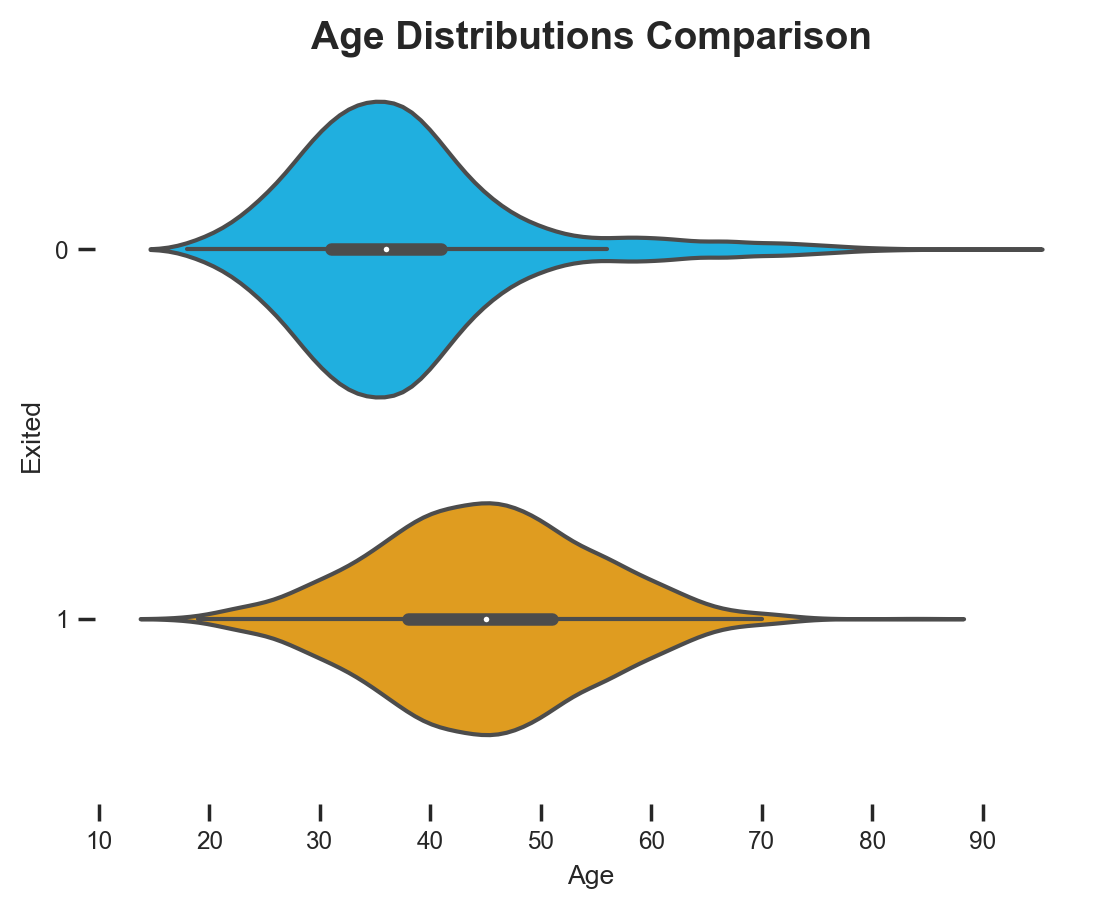

In [22]:
# Violin Plots
plt.title("Age Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.violinplot(data=df, x='Age', y='Exited', orient='h');

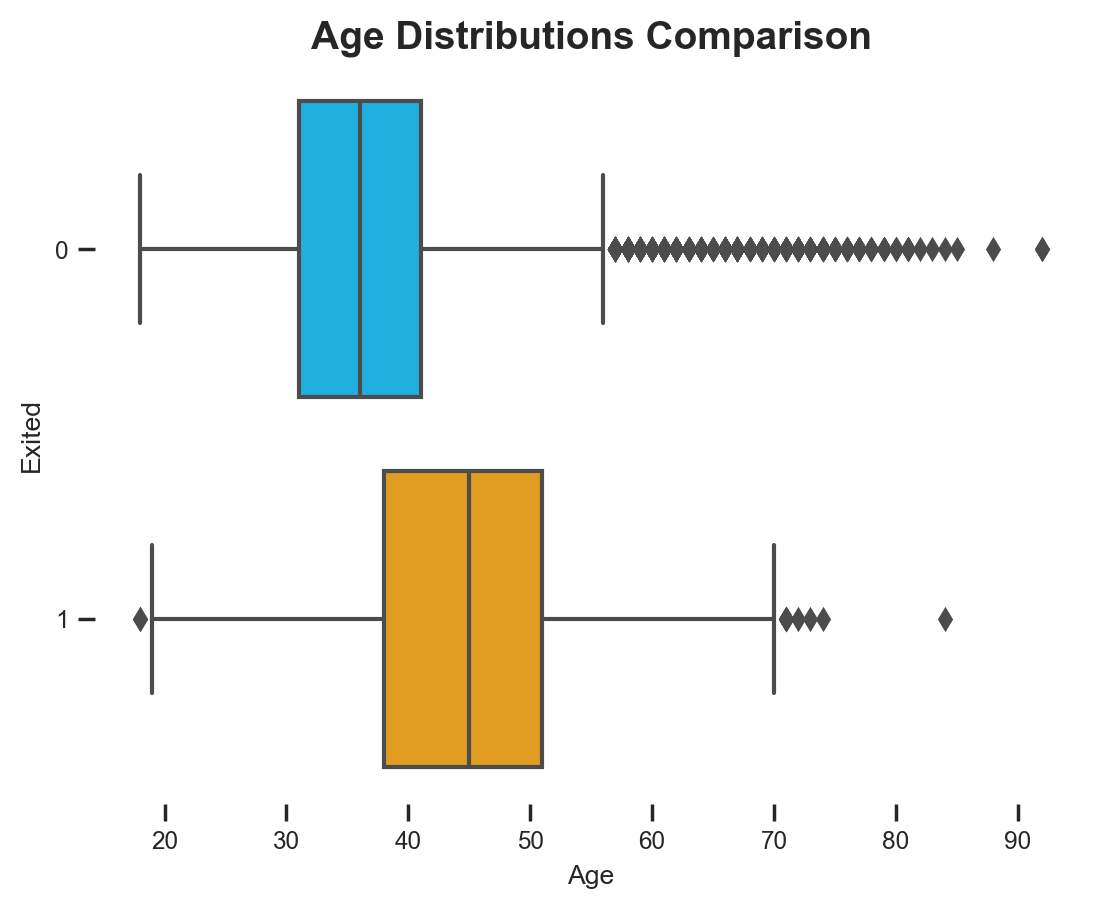

In [23]:
# Box Plots
plt.title("Age Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.boxplot(data=df, x='Age', y='Exited', orient='h');

In [24]:
# Basic Stats
df[['Age','Exited']].groupby('Exited').describe().apply(lambda s: s.apply('{:,.2f}'.format))

Age                                                 
           count   mean    std    min    25%    50%    75%    max
Exited                                                           
0       7,963.00  37.41  10.13  18.00  31.00  36.00  41.00  92.00
1       2,037.00  44.84   9.76  18.00  38.00  45.00  51.00  84.00

**Interpretation:** 
We see that there's a chunk of people who've exited in the 18-43(?) range, but a large majority of people who exit are in the 44(?)-65  age range. 

## Tenure

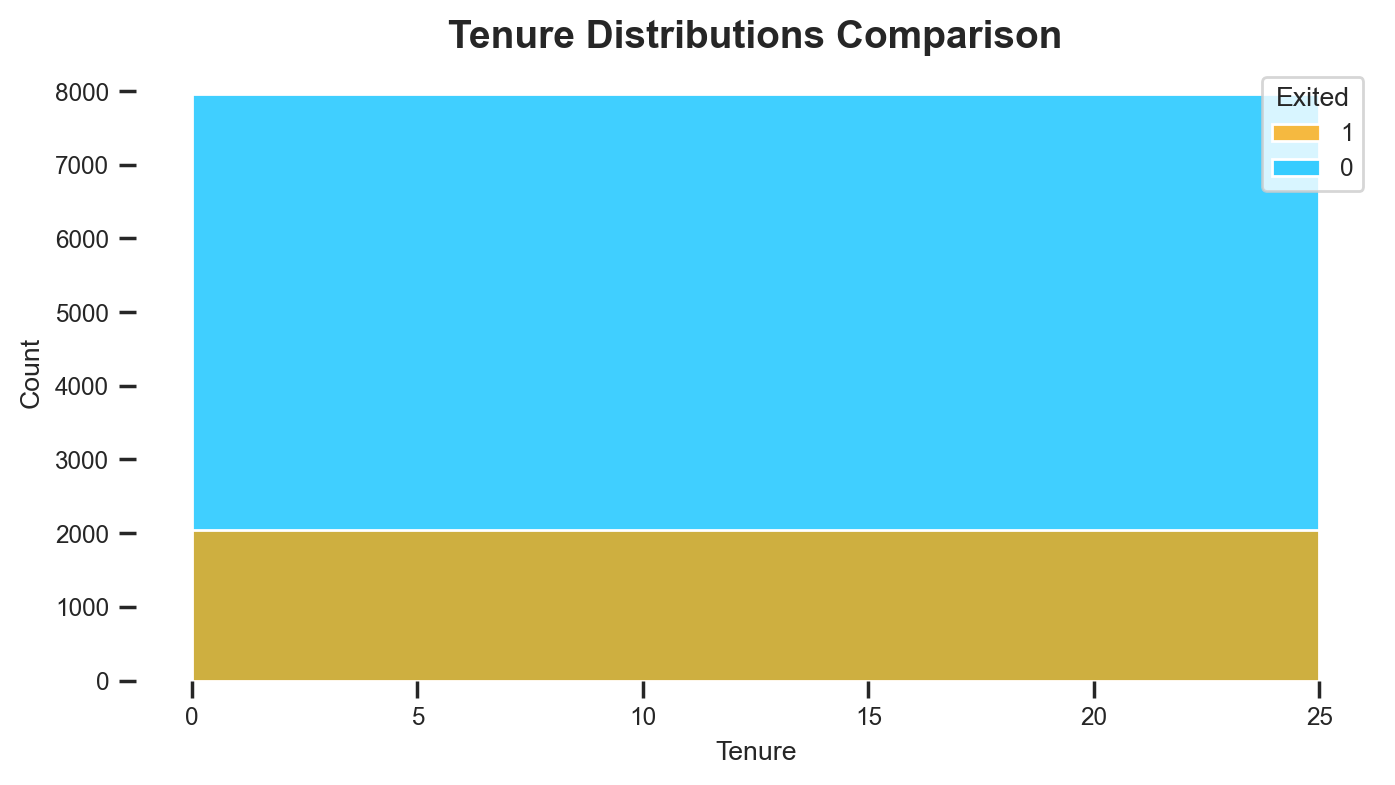

In [25]:
# Histogram
# Control hue_order and palette to display minority class in orange on top: hue_order=1,0 and palette=cp2
plt.figure(figsize=(8,4))
plt.title("Tenure Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.histplot(data=df, x='Tenure', hue='Exited', hue_order=[1,0], palette=cp2, binwidth=25, alpha=0.75);

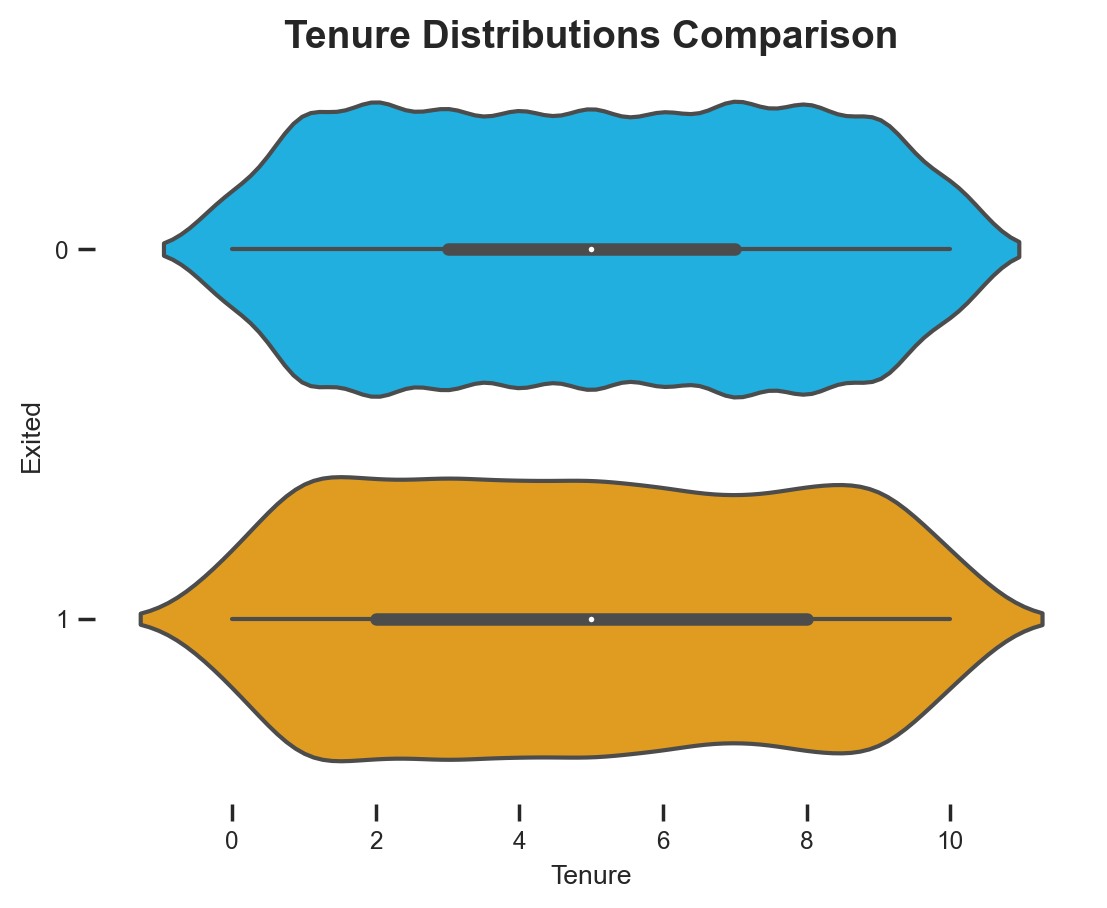

In [26]:
# Violin Plots
plt.title("Tenure Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.violinplot(data=df, x='Tenure', y='Exited', orient='h');

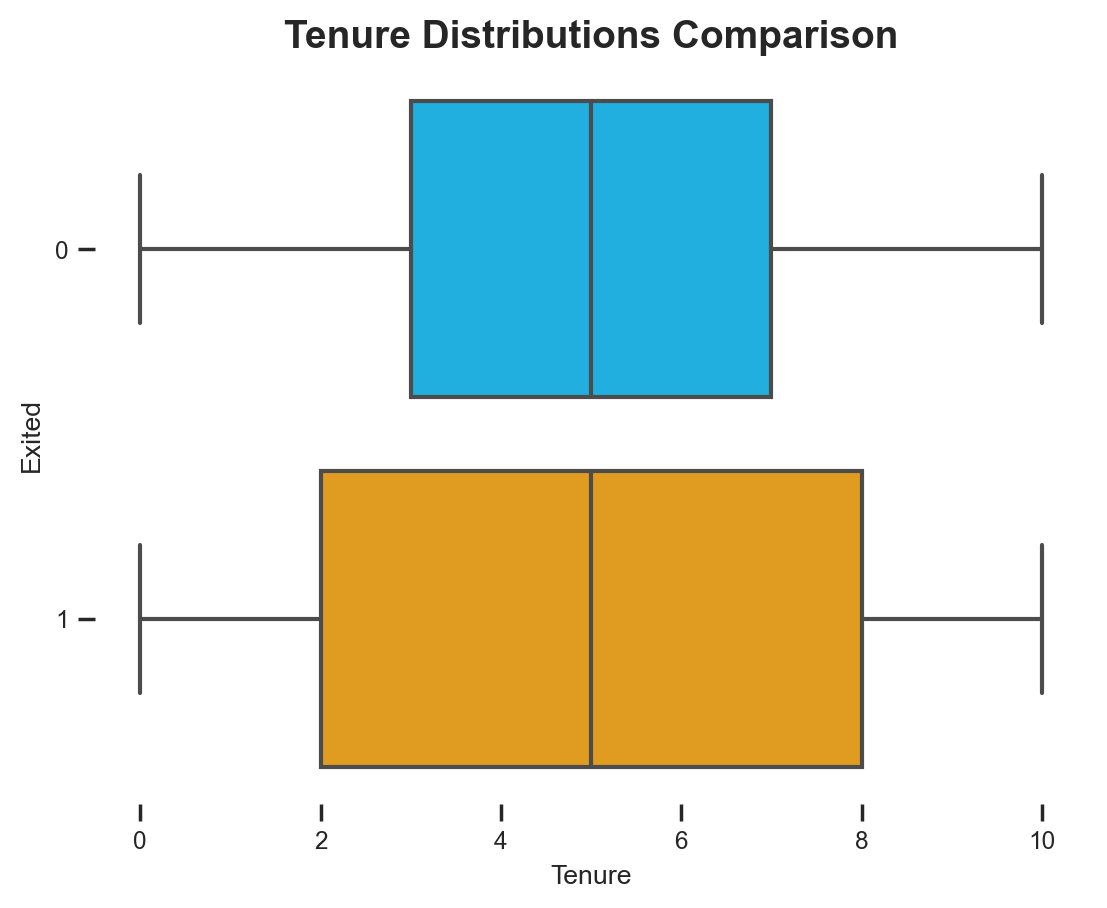

In [27]:
# Box Plots
plt.title("Tenure Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.boxplot(data=df, x='Tenure', y='Exited', orient='h');

In [28]:
# Basic Stats
df[['Tenure','Exited']].groupby('Exited').describe().apply(lambda s: s.apply('{:,.2f}'.format))

Tenure                                           
           count  mean   std   min   25%   50%   75%    max
Exited                                                     
0       7,963.00  5.03  2.88  0.00  3.00  5.00  7.00  10.00
1       2,037.00  4.93  2.94  0.00  2.00  5.00  8.00  10.00

**Interpretation:** 
I'm not sure if there are any insights to be gleaned from "Tenure".

## Balance

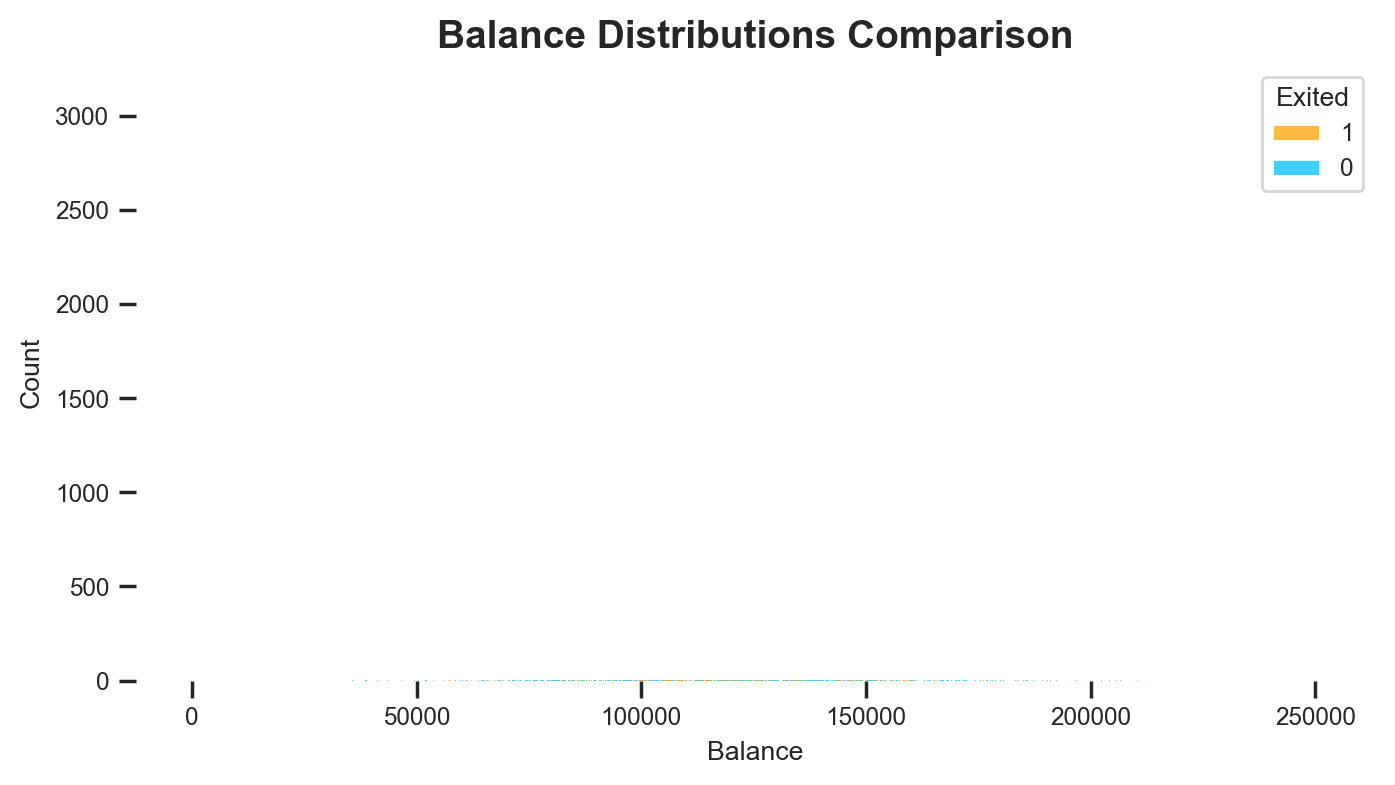

In [29]:
# Histogram
# Control hue_order and palette to display minority class in orange on top: hue_order=1,0 and palette=cp2
plt.figure(figsize=(8,4))
plt.title("Balance Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.histplot(data=df, x='Balance', hue='Exited', hue_order=[1,0], palette=cp2, binwidth=25, alpha=0.75);

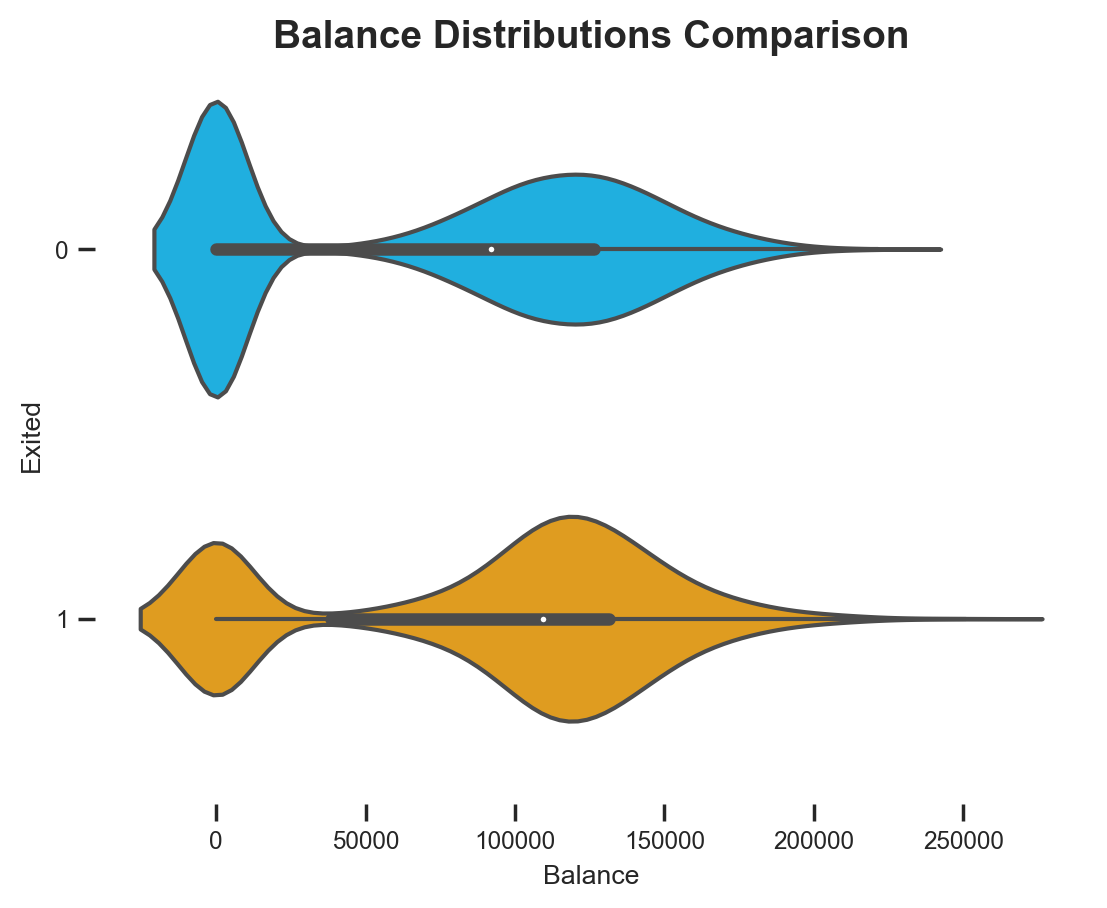

In [30]:
# Violin Plots
plt.title("Balance Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.violinplot(data=df, x='Balance', y='Exited', orient='h');

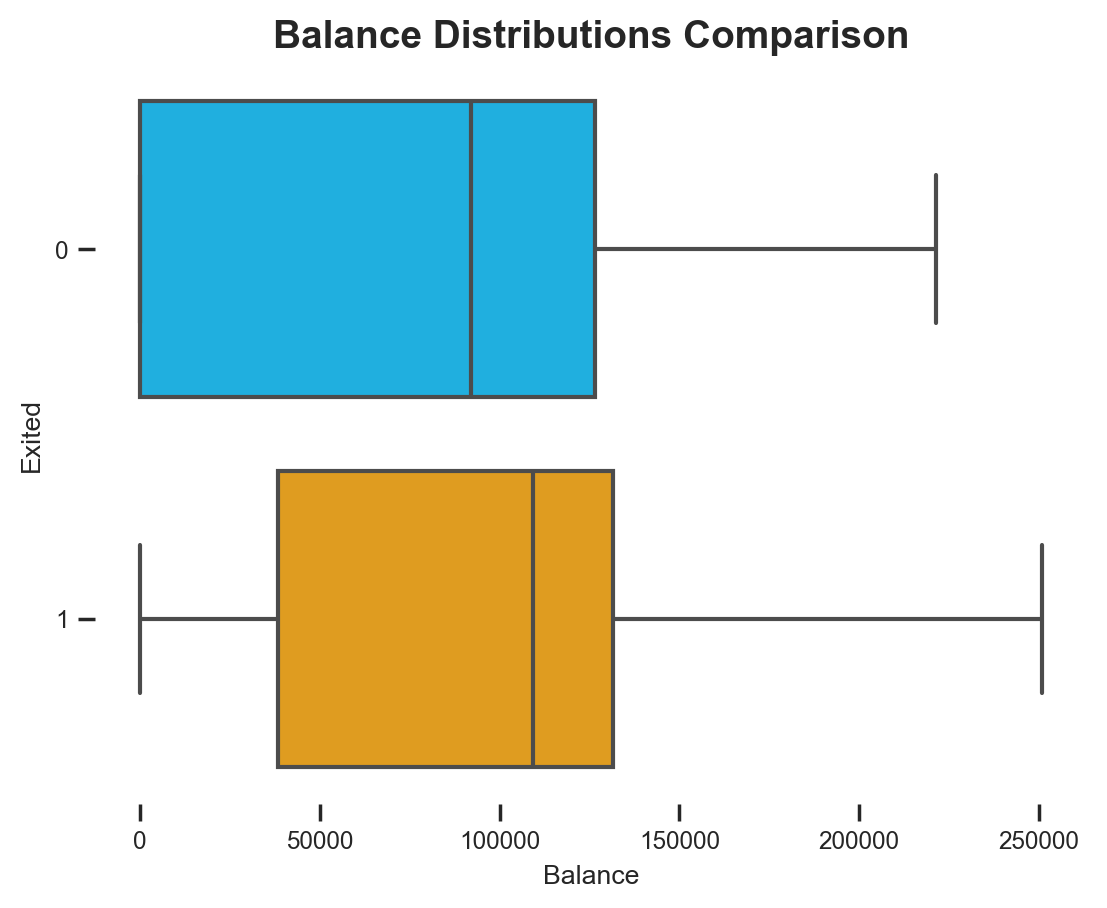

In [31]:
# Box Plots
plt.title("Balance Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.boxplot(data=df, x='Balance', y='Exited', orient='h');

In [34]:
# Basic Stats
df[['Balance','Exited']].groupby('Exited').describe().apply(lambda s: s.apply('{:,.2f}'.format))

Balance                                                     \
           count       mean        std   min        25%         50%   
Exited                                                                
0       7,963.00  72,745.30  62,848.04  0.00       0.00   92,072.68   
1       2,037.00  91,108.54  58,360.79  0.00  38,340.02  109,349.29   

                                
               75%         max  
Exited                          
0       126,410.28  221,532.80  
1       131,433.33  250,898.09

**Interpretation:** 
We see that people who exited the company tend to have a higher balance. This is likely due to them having been working at the company longer, and thereby accumulating a higher balance over time.

## EstimatedSalary

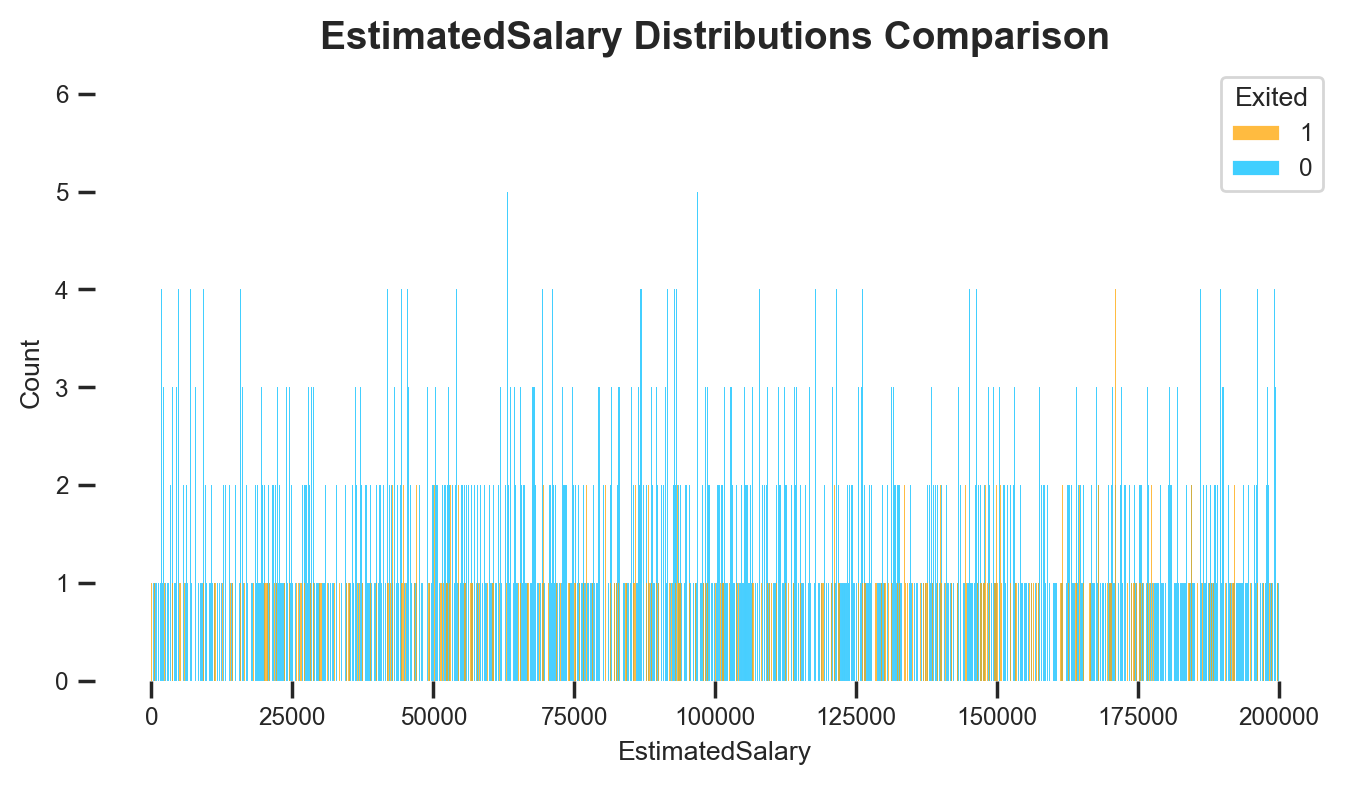

In [36]:
# Histogram
# Control hue_order and palette to display minority class in orange on top: hue_order=1,0 and palette=cp2
plt.figure(figsize=(8,4))
plt.title("EstimatedSalary Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.histplot(data=df, x='EstimatedSalary', hue='Exited', hue_order=[1,0], palette=cp2, binwidth=25, alpha=0.75);

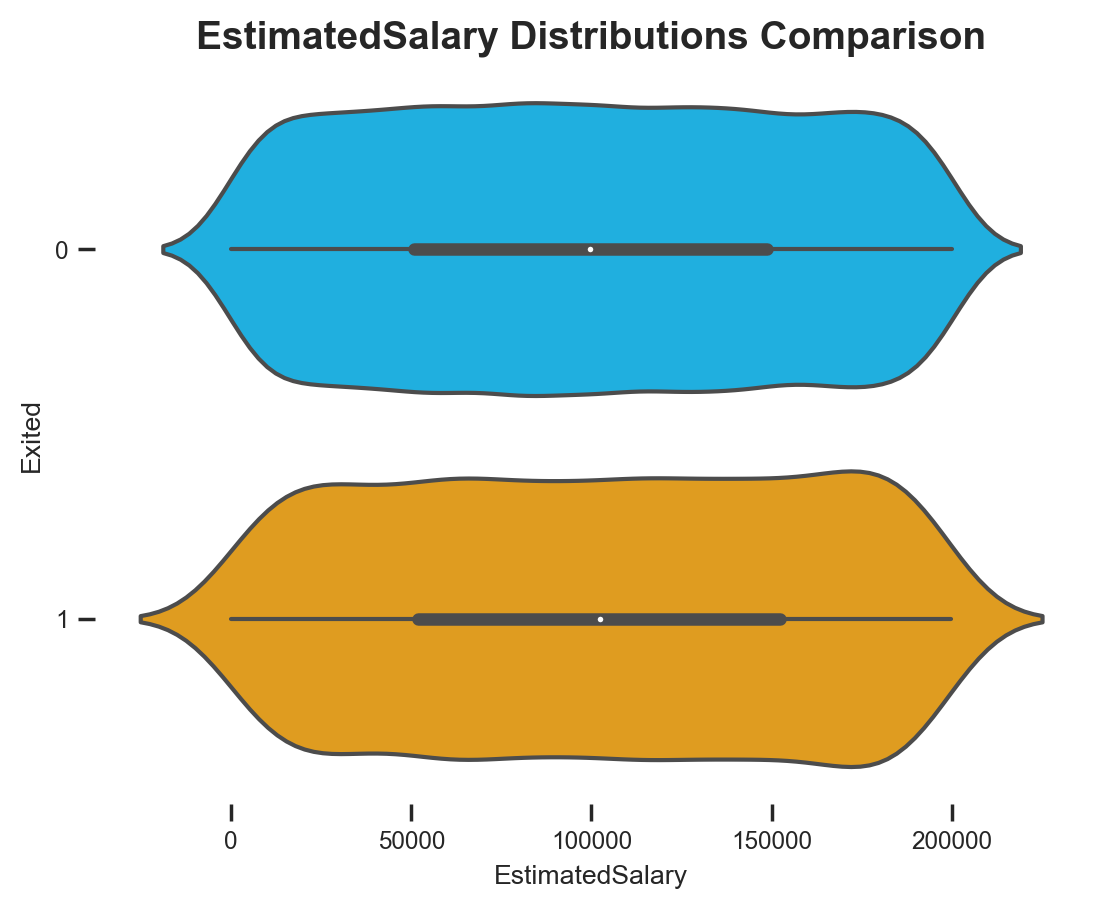

In [32]:
# Violin Plots
plt.title("EstimatedSalary Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.violinplot(data=df, x='EstimatedSalary', y='Exited', orient='h');

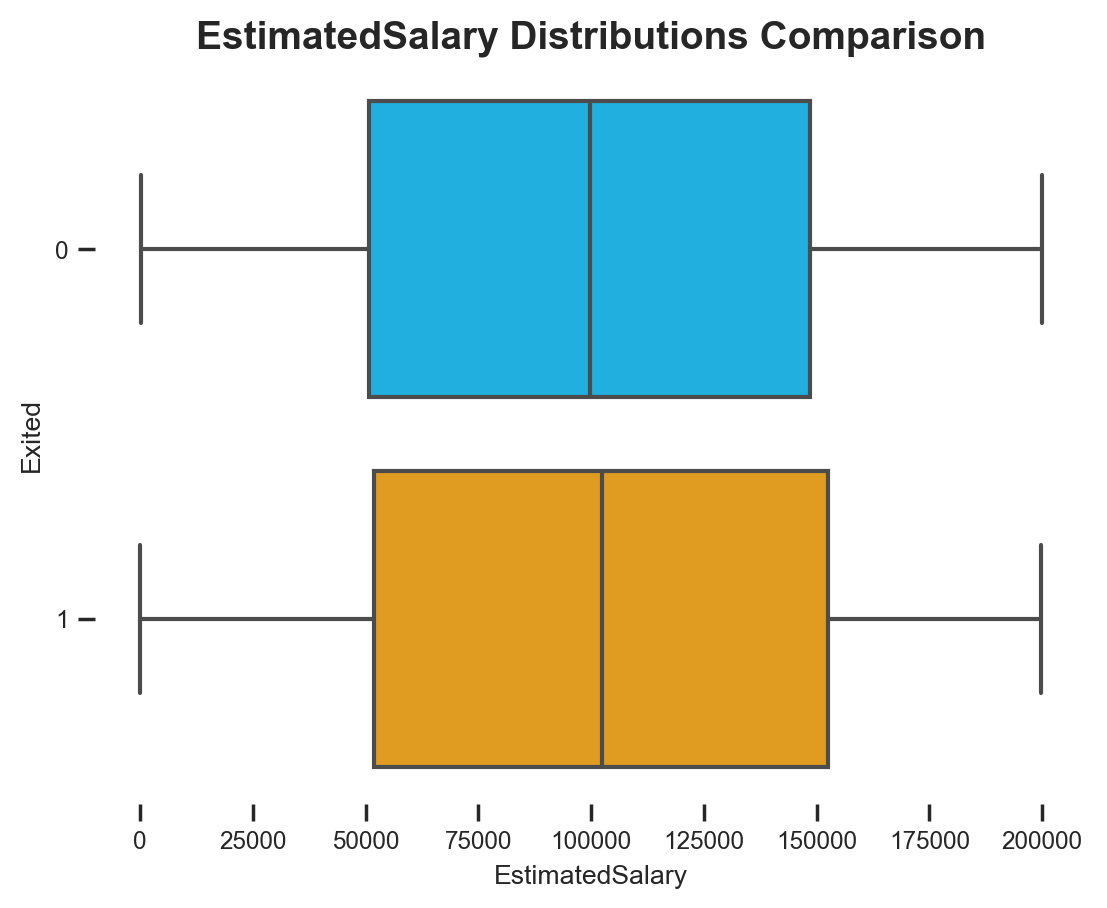

In [33]:
# Box Plots
plt.title("EstimatedSalary Distributions Comparison", fontsize=14, fontweight='bold')
ax = sns.boxplot(data=df, x='EstimatedSalary', y='Exited', orient='h');

In [34]:
# Basic Stats
df[['EstimatedSalary','Exited']].groupby('Exited').describe().apply(lambda s: s.apply('{:,.2f}'.format))

EstimatedSalary                                                       \
                 count        mean        std    min        25%         50%   
Exited                                                                        
0             7,963.00   99,738.39  57,405.59  90.07  50,783.49   99,645.04   
1             2,037.00  101,465.68  57,912.42  11.58  51,907.72  102,460.84   

                                
               75%         max  
Exited                          
0       148,609.96  199,992.48  
1       152,422.91  199,808.10

**Interpretation:** 
We see that people who've exited have a higher average salary.

### Summary of Continuous Features Analysis

#### No Apparent Predictive Relevance
- `Tenure`: tenure has a larger IQR, but otherwise very similar distributions, means, and medians
- `EstimatedSalary`: averages and distributions are nearly identical

#### Perhaps Small Predictive Relevance
- `CreditScore`: **small if any predictive relevance**: there are small distribution differences

#### Likely of Some Relevance
- `Age`: churners average 9 years older than non-churners
- `Balance`: churners have an approximately 15% higher average balance


# Explore Categorical and Ordinal Features
- Geography
- Gender
- NumOfProducts
- HasCrCard
- IsActiveMember
- and Target: Exited

In [38]:
# Create a variable to filter for categorical and ordinal features
cat_feats = list(df.dtypes[df.dtypes == 'object'].index)
ord_feats = list(df.dtypes[df.dtypes != 'object'].index)
# Preview these features
print(cat_feats)
print()
print(ord_feats)

['Geography', 'Gender']

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [39]:
# View number of unique categories for each cateogrical and ordinal feature
df[cat_feats].nunique()

Geography    3
Gender       2
dtype: int64

## Geography

In [40]:
# Number of customers per category
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

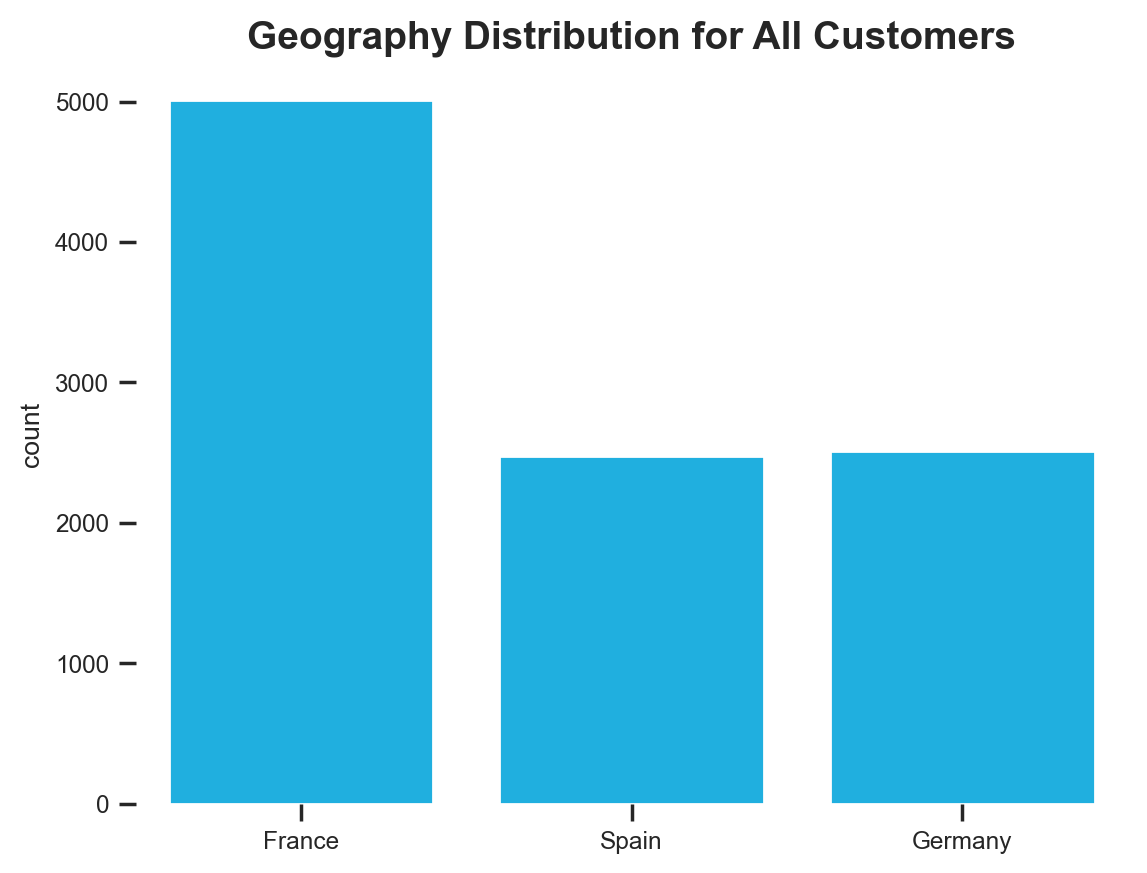

In [41]:
# Countplot for all customers
plt.title("Geography Distribution for All Customers", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='Geography', color=blue);
ax.set(xlabel = '');

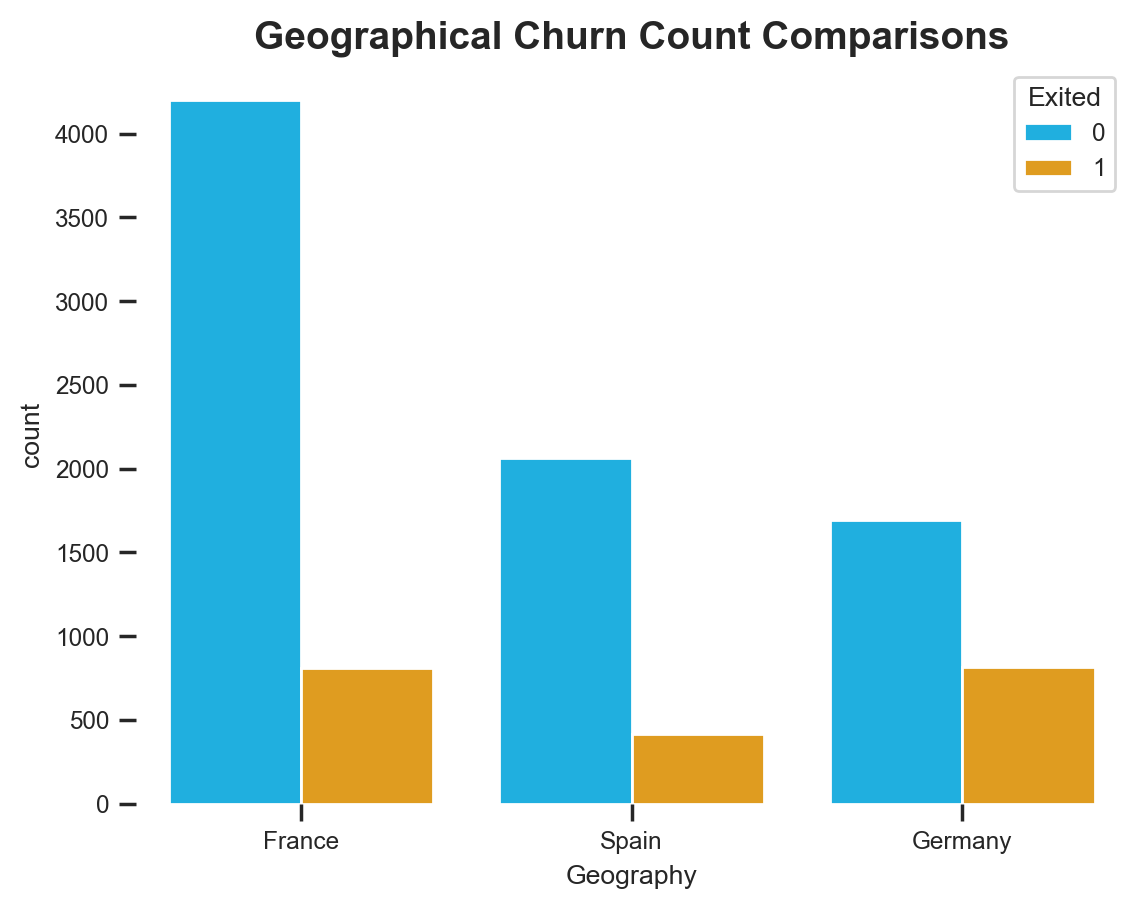

In [42]:
# Countplot of churners and non-churners for this category
plt.title("Geographical Churn Count Comparisons", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='Geography', hue='Exited');
# ax.set(xlabel = 'Custom x axis label', ylabel='Custom y axis label');

/var/folders/33/kq7yxs117ws746hm3wh2w2v80000gn/T/ipykernel_42813/4105247006.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='Geography', y='Exited', ci=None, color=blue);


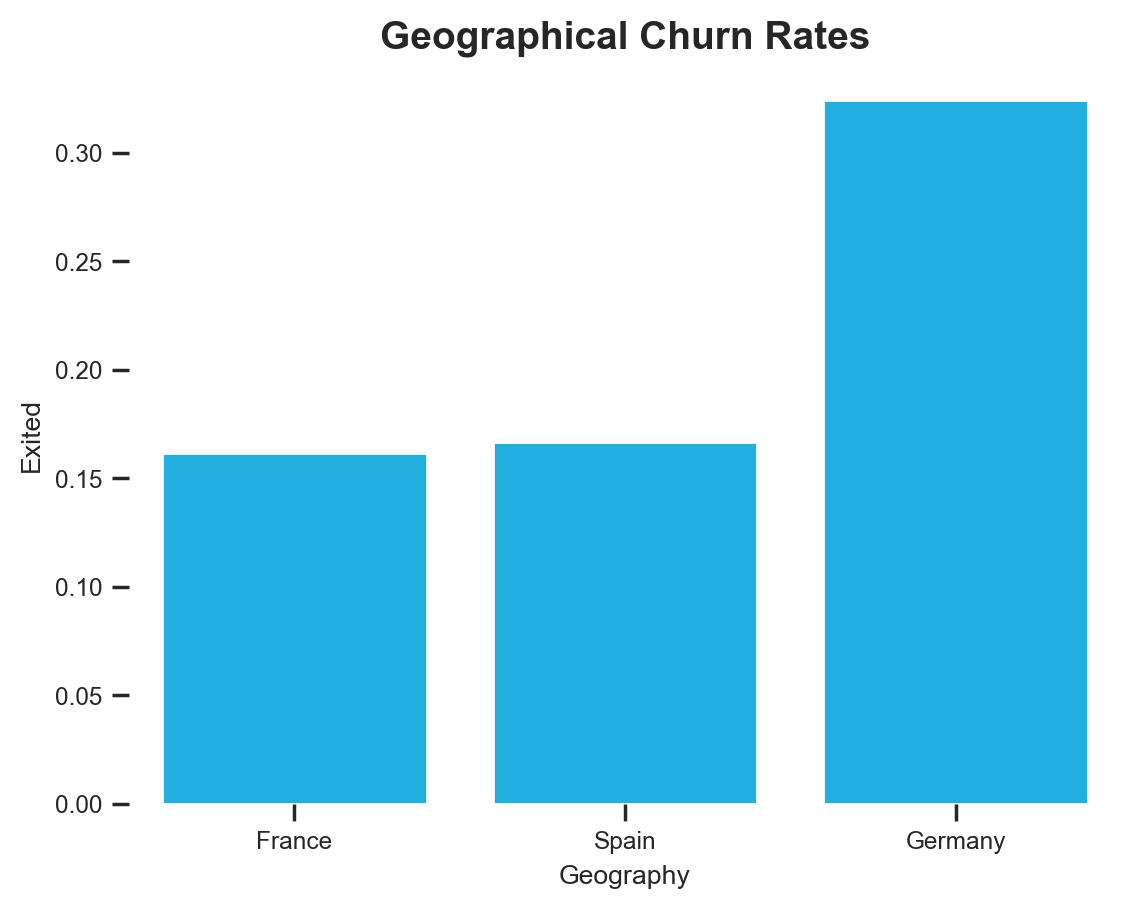

In [43]:
# Barplot of churn rates for this category
plt.title("Geographical Churn Rates", fontsize=14, fontweight='bold')
ax = sns.barplot(data=df, x='Geography', y='Exited', ci=None, color=blue);
# ax.set(xlabel = 'Custom x axis label', ylabel='Custom y axis label');

In [44]:
# Calculate Churn Rate for this category
df[['Geography','Exited']].groupby('Geography').mean()

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


**Interpretation**: German customers are churning at nearly twice the rate of those from France and Spain!

## Gender

In [45]:
# Count of Customers per Category
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

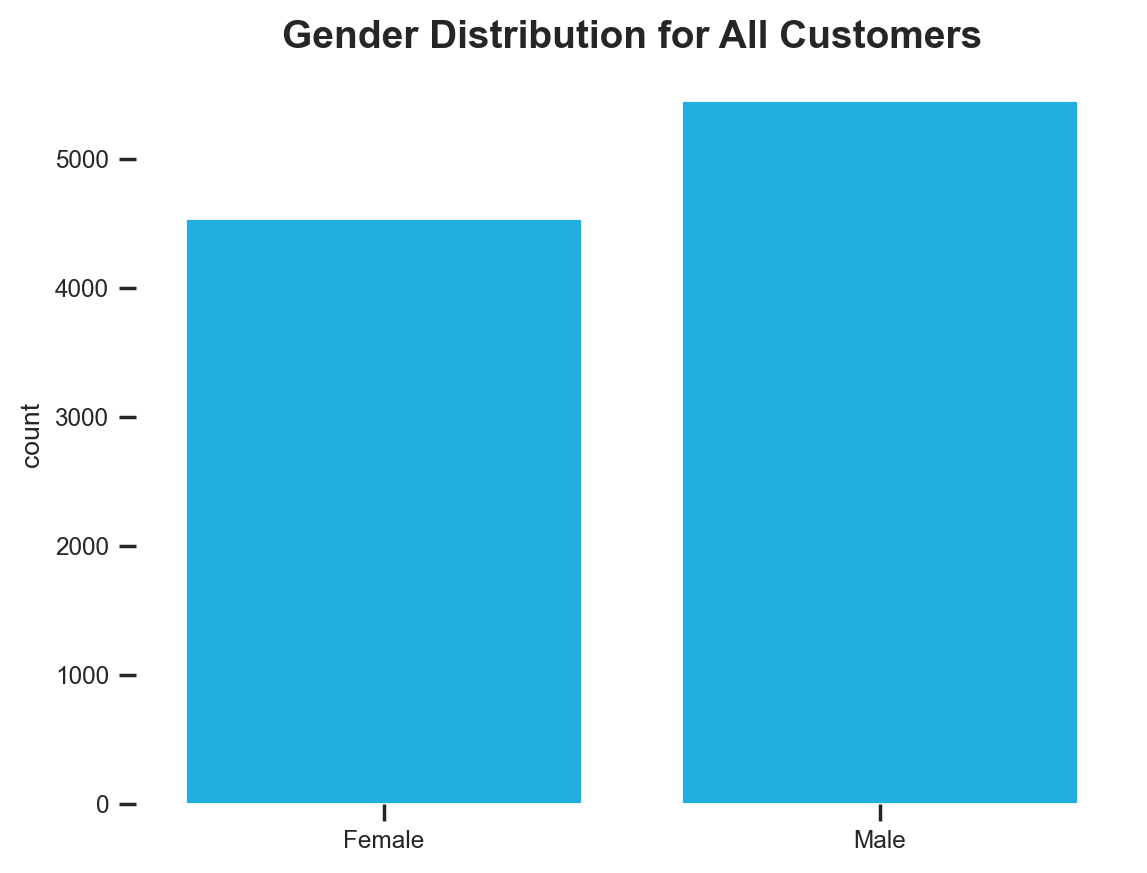

In [46]:
# Countplot for all customers
plt.title("Gender Distribution for All Customers", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='Gender', color=blue);
ax.set(xlabel = '');

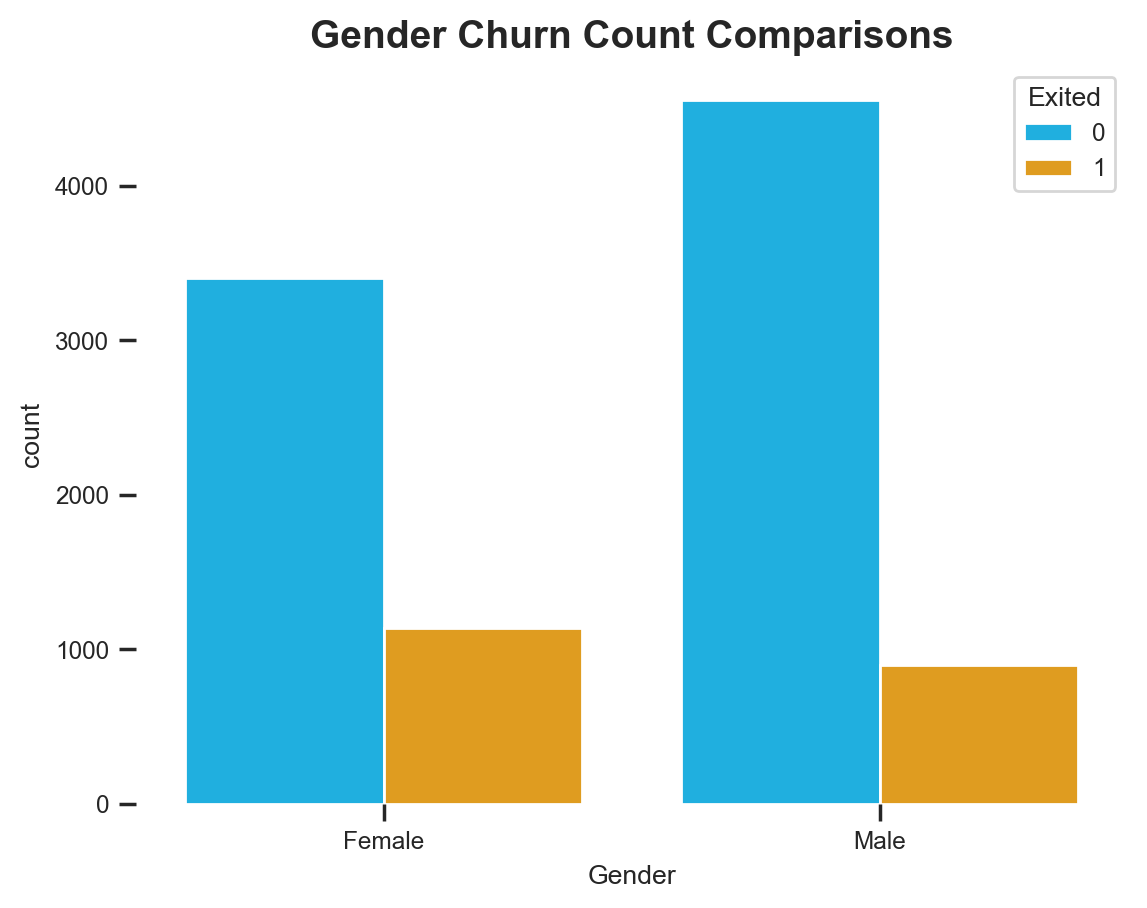

In [47]:
# Countplot of churners and non-churners for this category
plt.title("Gender Churn Count Comparisons", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='Gender', hue='Exited');

/var/folders/33/kq7yxs117ws746hm3wh2w2v80000gn/T/ipykernel_42813/748533254.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='Gender', y='Exited', ci=None, color=blue);


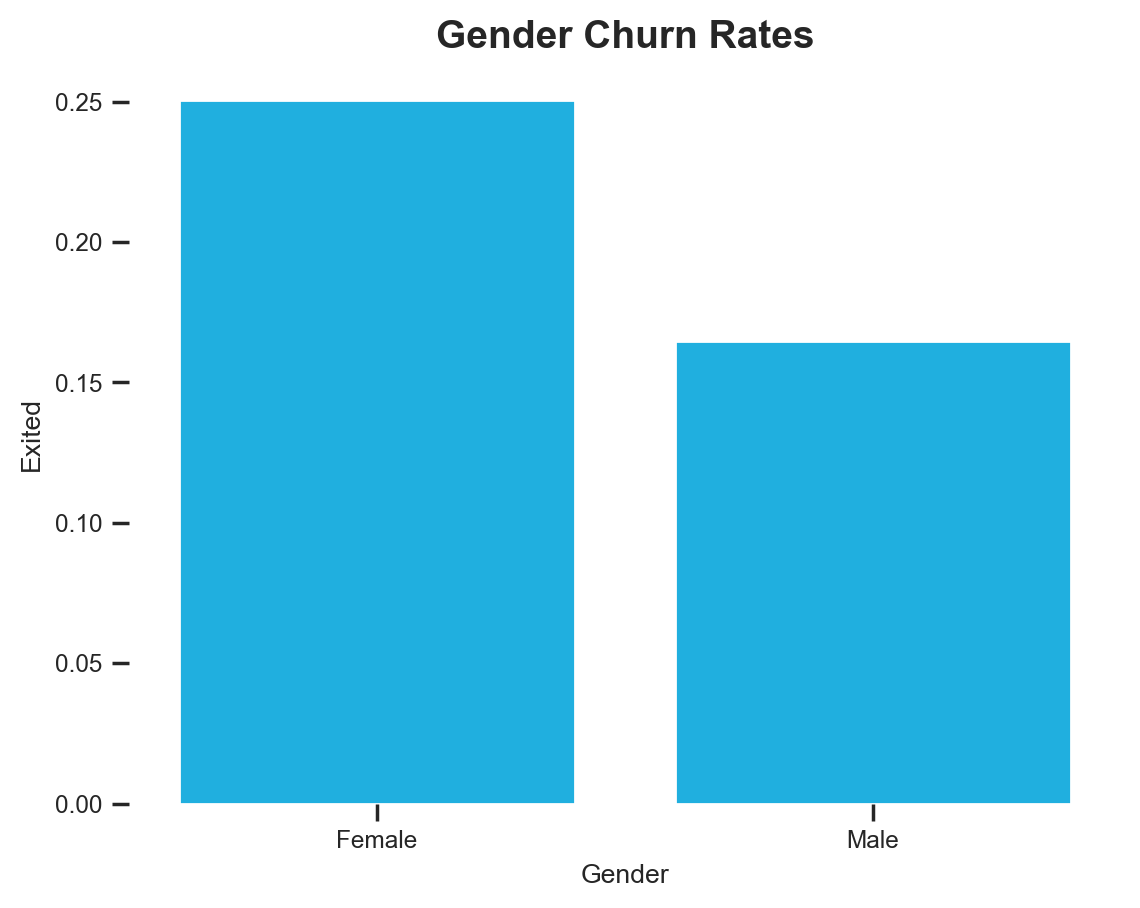

In [49]:
# Barplot of churn rates for this category
plt.title("Gender Churn Rates", fontsize=14, fontweight='bold')
ax = sns.barplot(data=df, x='Gender', y='Exited', ci=None, color=blue);

In [50]:
# Calculate Churn Rate for this category
df[['Geography','Exited']].groupby('Geography').mean()

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


**Interpretation**: Women churn at nearly a 10% higher rate than men: Women at 25%; Men at 16.45%.

## NumOfProducts

In [51]:
# Count of Customers per NumOfProducts value
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

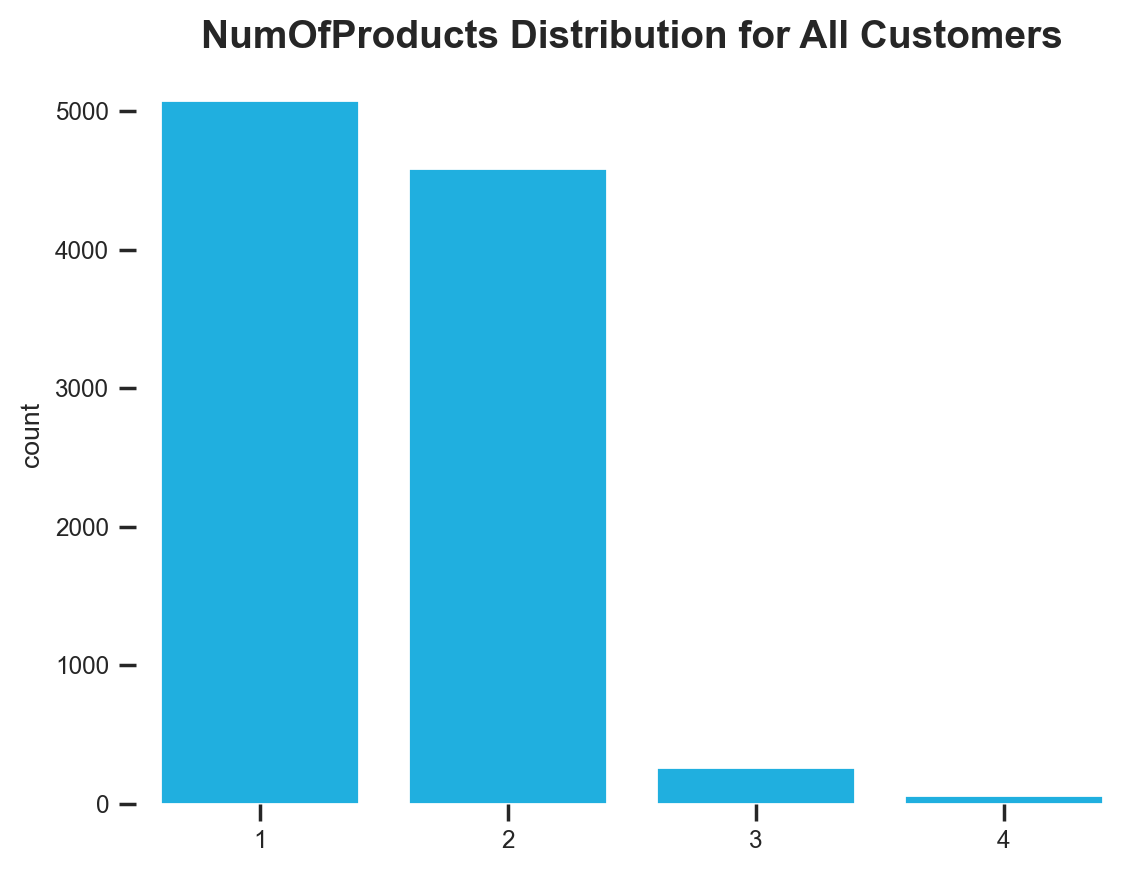

In [52]:
# Countplot for all customers
plt.title("NumOfProducts Distribution for All Customers", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='NumOfProducts', color=blue);
ax.set(xlabel = '');

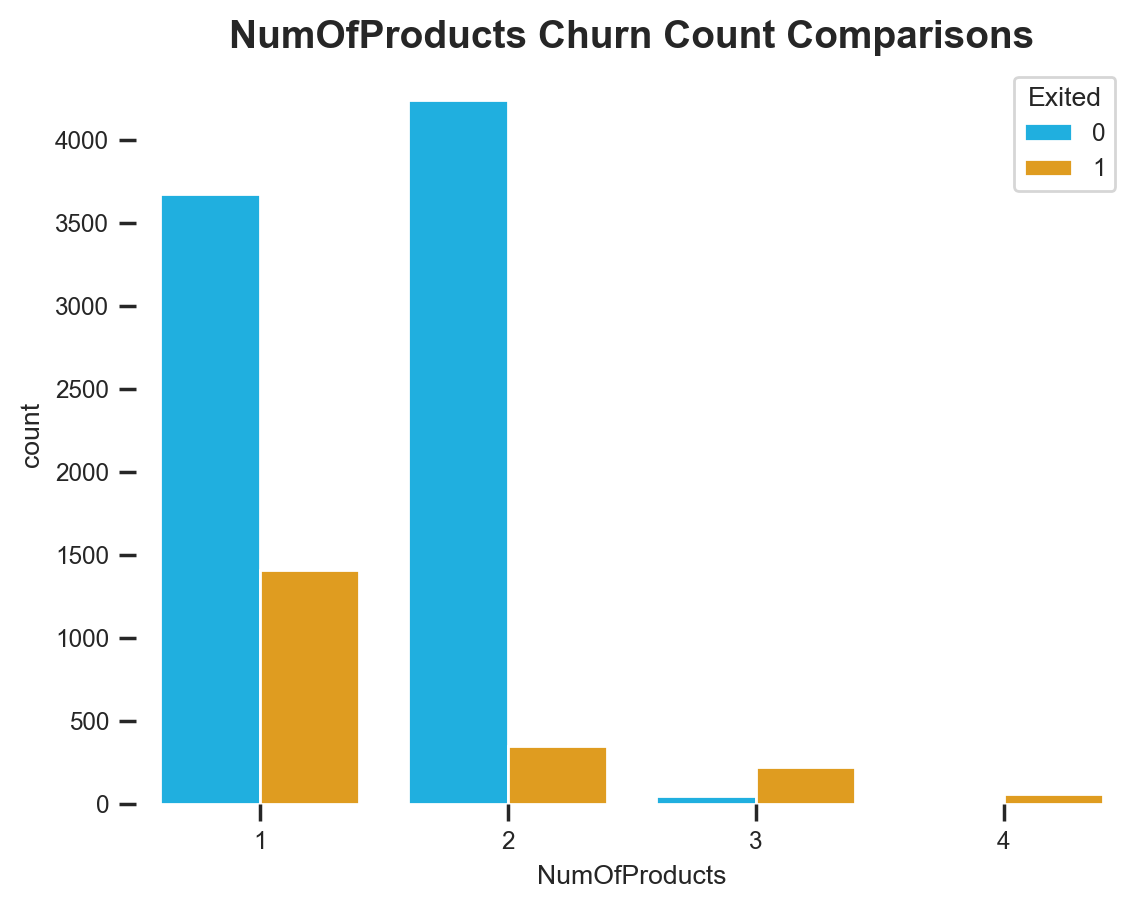

In [55]:
# Countplot of churners and non-churners for this ordinal feature
plt.title("NumOfProducts Churn Count Comparisons", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='NumOfProducts', hue='Exited');

/var/folders/33/kq7yxs117ws746hm3wh2w2v80000gn/T/ipykernel_42813/872807037.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='NumOfProducts', y='Exited', ci=None, color=blue);


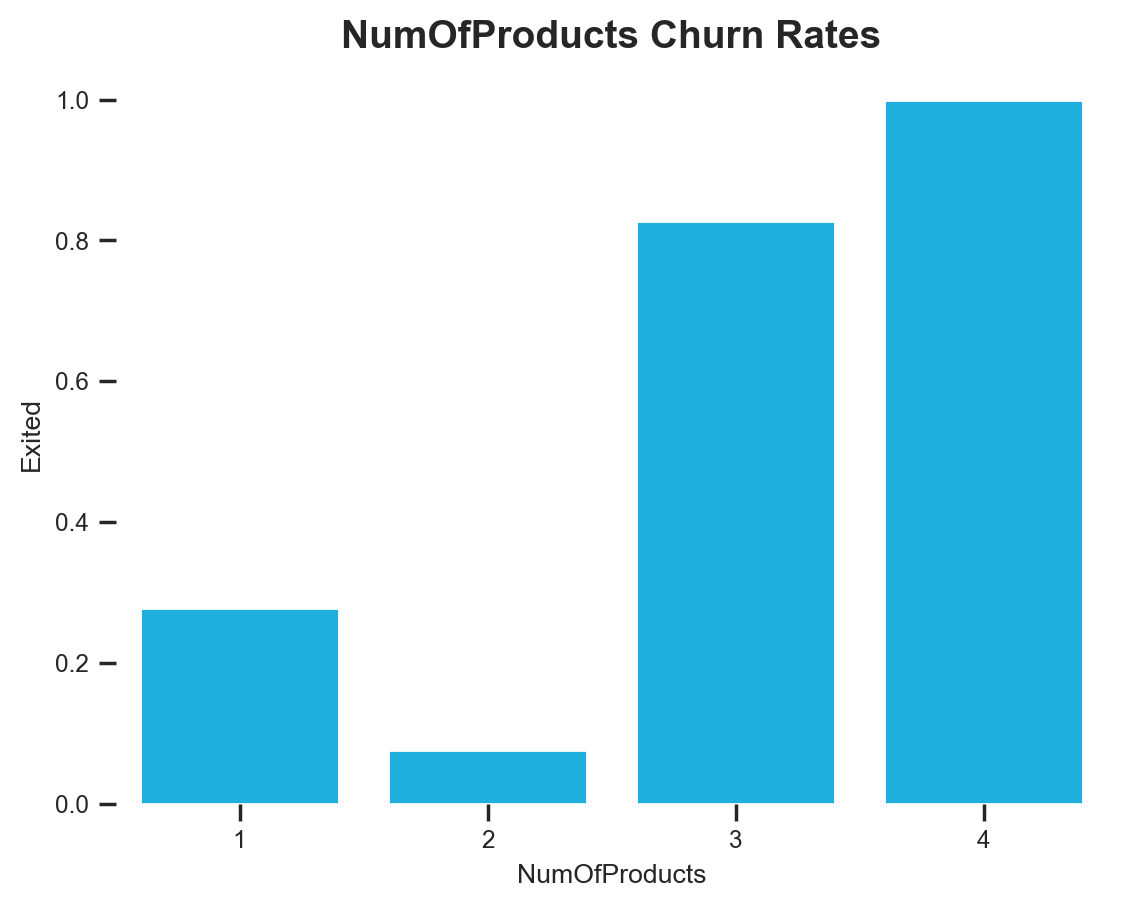

In [56]:
# Barplot of churn rates for this ordinal feature
plt.title("NumOfProducts Churn Rates", fontsize=14, fontweight='bold')
ax = sns.barplot(data=df, x='NumOfProducts', y='Exited', ci=None, color=blue);

In [57]:
# Calculate Churn Rate for this ordinal feature
df[['NumOfProducts','Exited']].groupby('NumOfProducts').mean()

,Exited
NumOfProducts,
1,0.277144
2,0.075817
3,0.827068
4,1.000000


**Interpretation**: Customers who buy 2 products are our best demographic when it comes to not churning. We should be very wary about customers who buy 3-4 products.

## HasCrCard

In [60]:
# Count of Customers per HasCrCard value
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

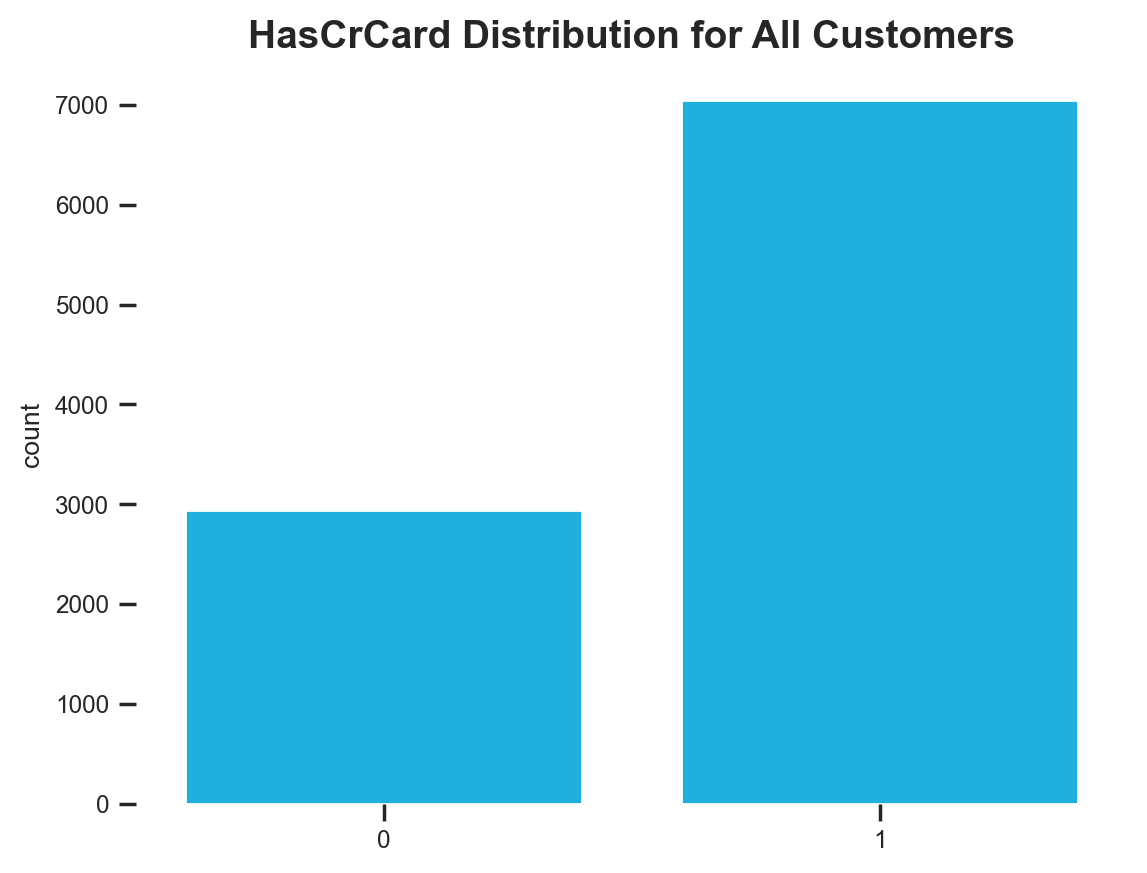

In [61]:
# Countplot for all customers
plt.title("HasCrCard Distribution for All Customers", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='HasCrCard', color=blue);
ax.set(xlabel = '');

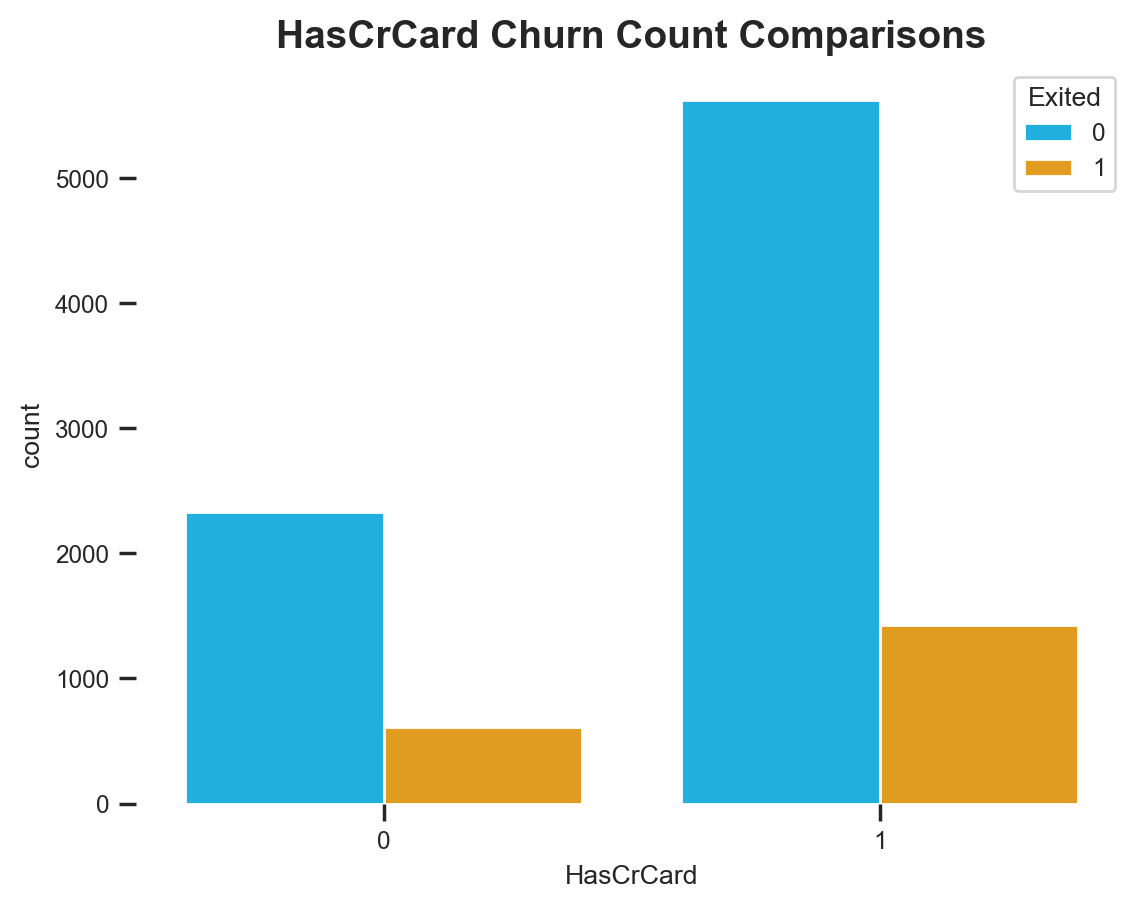

In [62]:
# Countplot of churners and non-churners for this ordinal feature
plt.title("HasCrCard Churn Count Comparisons", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='HasCrCard', hue='Exited');

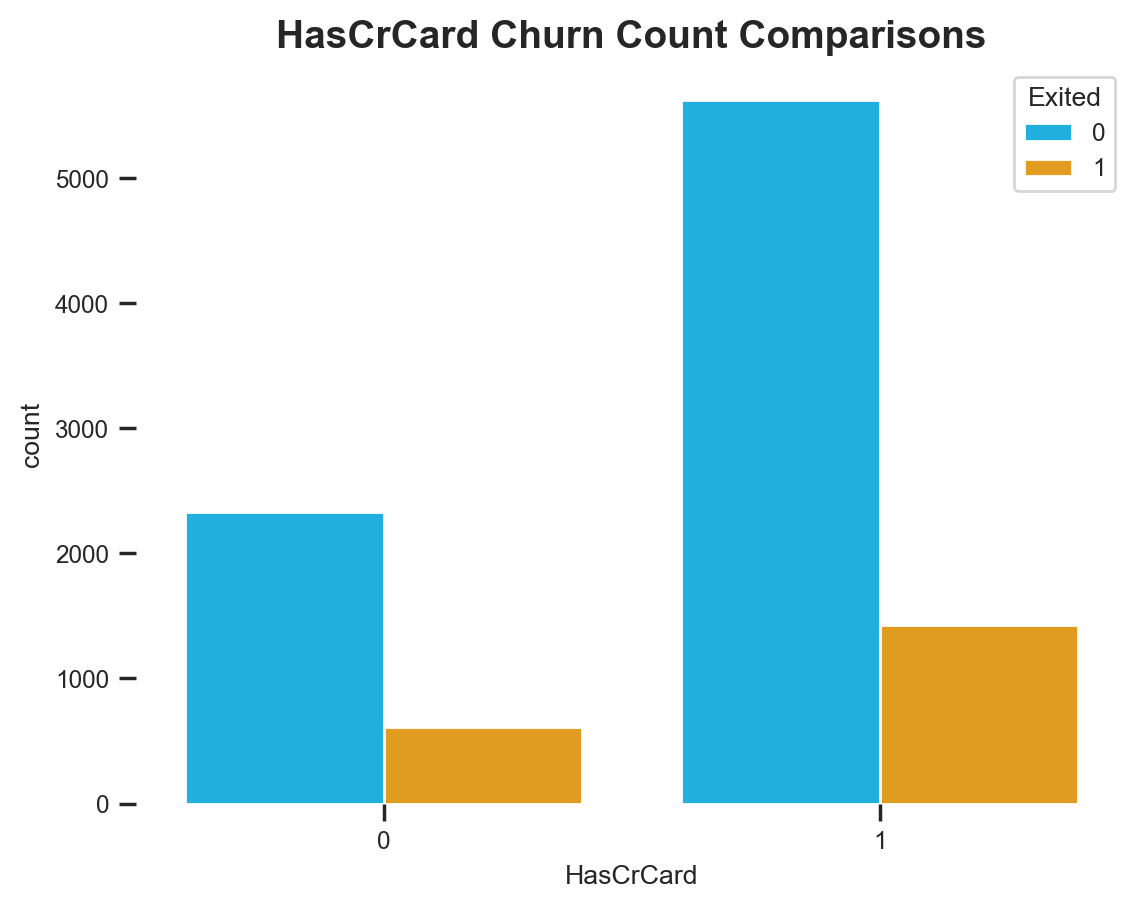

In [63]:
# Countplot of churners and non-churners for this ordinal feature
plt.title("HasCrCard Churn Count Comparisons", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='HasCrCard', hue='Exited');

In [64]:
# Calculate Churn Rate for this ordinal feature
df[['HasCrCard','Exited']].groupby('HasCrCard').mean()

,Exited
HasCrCard,
0,0.208149
1,0.201843


**Interpretation**: Whether customers have credit card(s) or not has no discernible effect on churn.

## IsActiveMember

In [65]:
# Count of Customers per IsActiveMember value
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

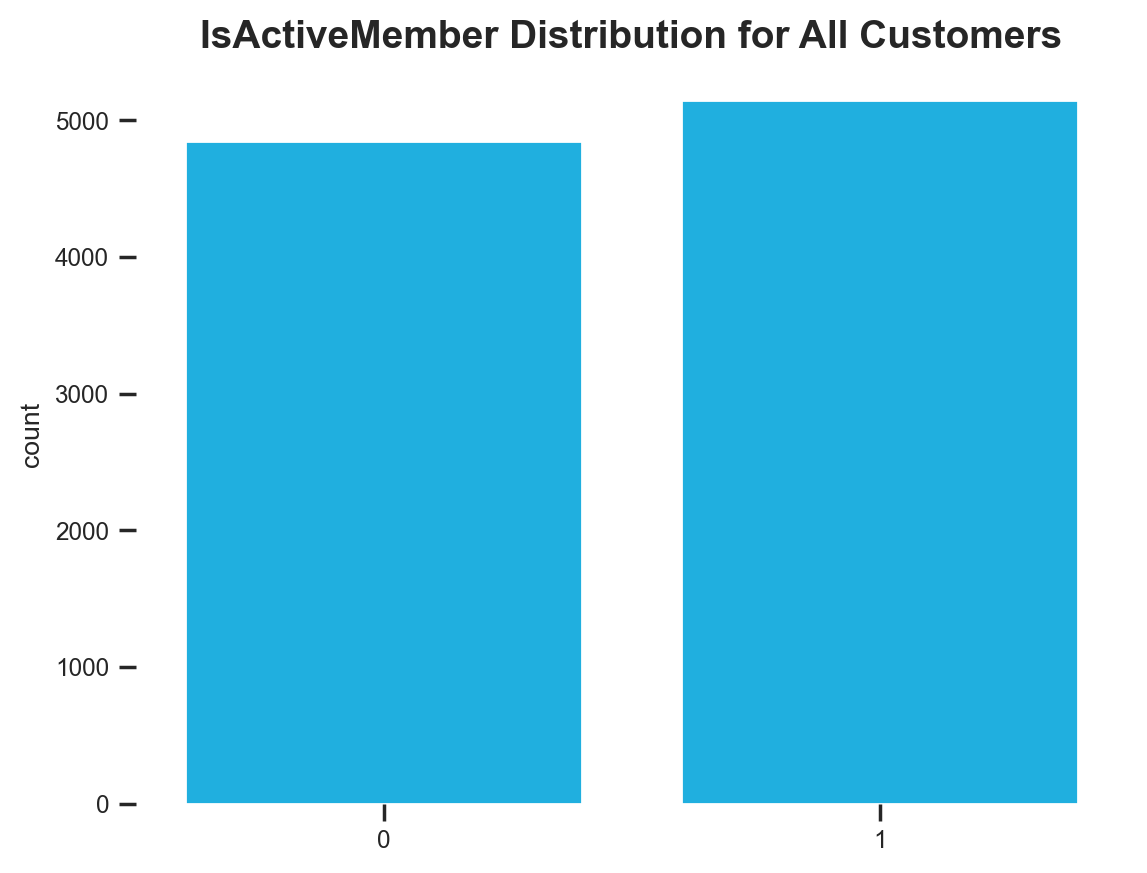

In [66]:
# Countplot for all customers
plt.title("IsActiveMember Distribution for All Customers", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='IsActiveMember', color=blue);
ax.set(xlabel = '');

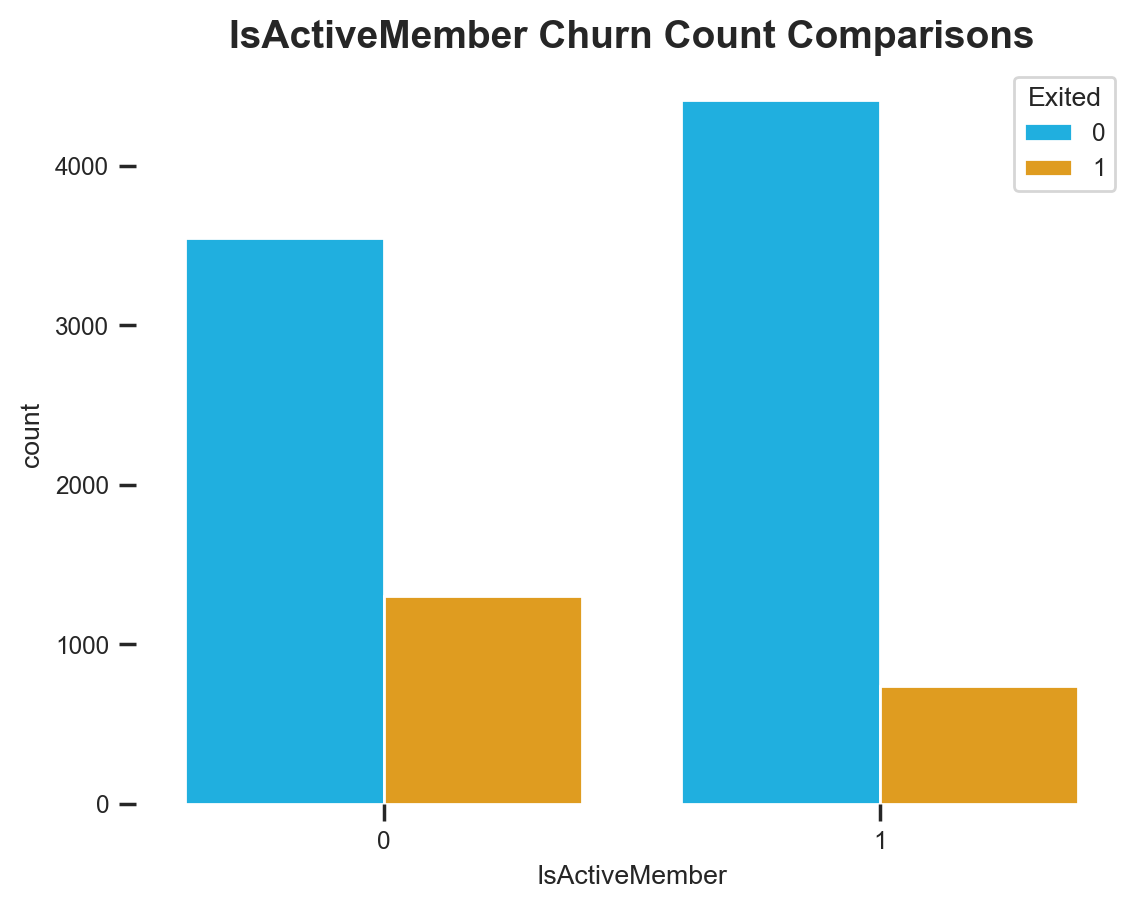

In [67]:
# Countplot of churners and non-churners for this ordinal feature
plt.title("IsActiveMember Churn Count Comparisons", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='IsActiveMember', hue='Exited');

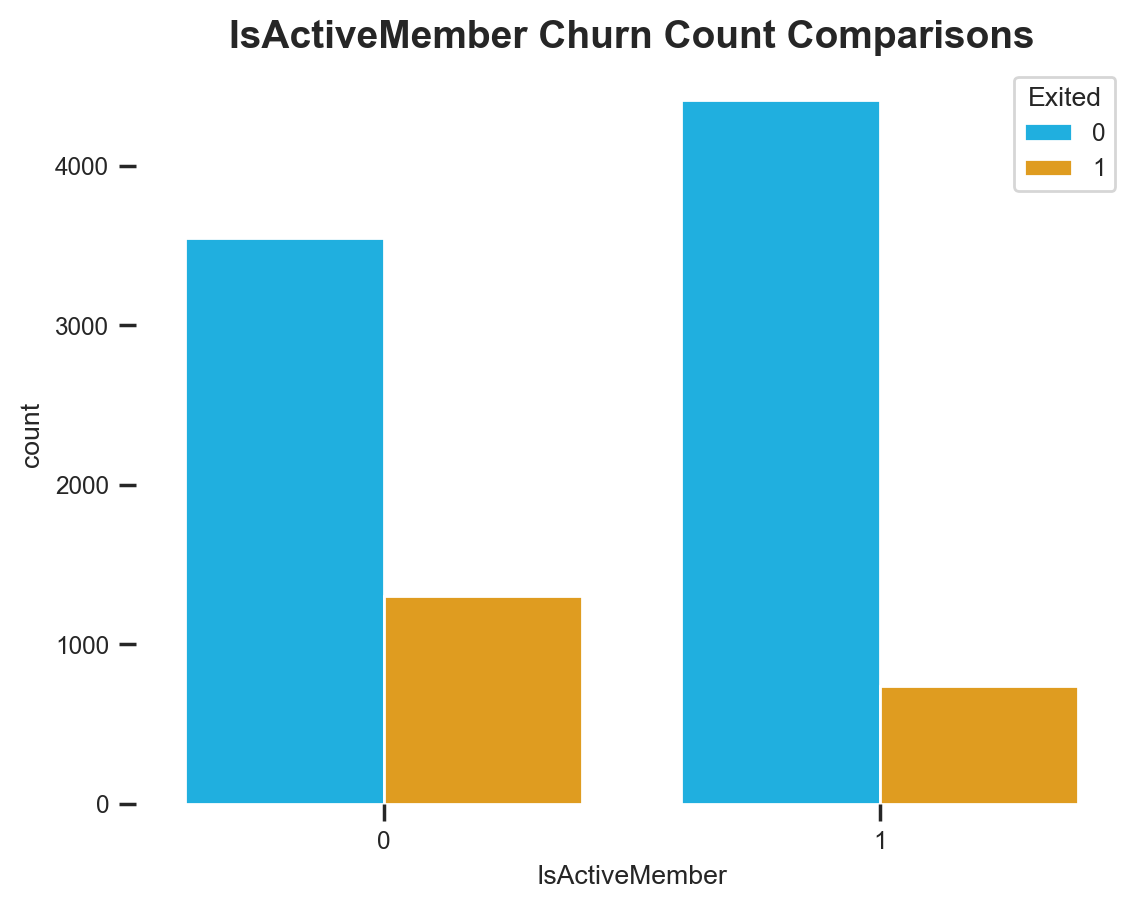

In [68]:
# Countplot of churners and non-churners for this ordinal feature
plt.title("IsActiveMember Churn Count Comparisons", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='IsActiveMember', hue='Exited');

In [69]:
# Calculate Churn Rate for this ordinal feature
df[['IsActiveMember','Exited']].groupby('IsActiveMember').mean()

,Exited
IsActiveMember,
0,0.268509
1,0.142691


**Interpretation**: Non-active members have a higher rate of churn.

### Summary of Categorical and Ordinal Feature Analysis



# Explore Relationships between Numeric Variables

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [71]:
# Create variable to hold all features with numeric data types
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
num = list(df.select_dtypes(include=['number']).columns)
df[num].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 781.2 KB


In [72]:
# Calculate Pearson Correlations for Numeric Features
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html 
df[num].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


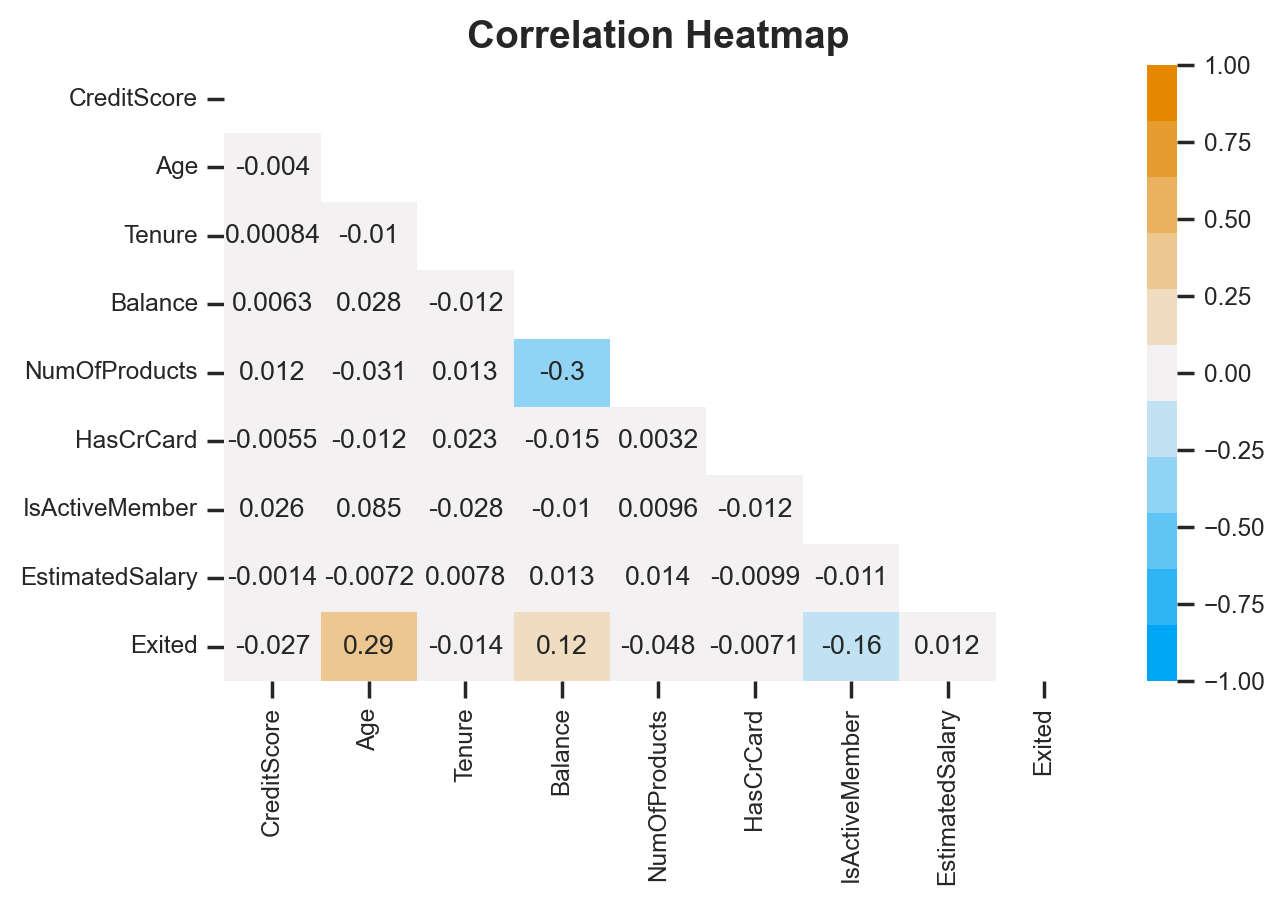

In [73]:
# Heatmap Pearson Correlations for Numeric Features
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.triu(np.ones_like(df[num].corr()))
plt.figure(figsize=(7,4))
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
ax = sns.heatmap(df[num].corr(), cmap=cpd, vmin=-1, vmax=1, mask=mask, annot=True);

**Interpretation**:
- There are no glaring multicollinearity problems with this data set.

# Data Prep
Prepare all fields for machine learning.

In [74]:
# Preview current dataframe
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
# Overview current dataframe fundamentals
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


## Convert Gender to 0 or 1

In [78]:
# Convert gender to binary integer: Male = 0, Female = 1
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,1,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
3,502,France,1,42,8,159660.80,3,1,0,113931.57,1
4,699,France,1,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


## Convert Geography to numeric

In [79]:
# Convert Geography to integer: France = 0, Spain = 1, Germany = 2
df['Geography'] = df['Geography'].replace({'France': 0, 'Spain': 1, 'Germany': 2})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,1,42,2,0.00,1,1,1,101348.88,1
2,608,1,1,41,1,83807.86,1,0,1,112542.58,0
3,502,0,1,42,8,159660.80,3,1,0,113931.57,1
4,699,0,1,39,1,0.00,2,0,0,93826.63,0
5,850,1,1,43,2,125510.82,1,1,1,79084.10,0


## Write to CSV

Write to CSV file, named `churn_cleaned.csv`

In [80]:
# Write to CSV
df.to_csv('data/Churn_Modelling_cleaned.csv', index=False)